<a href="https://colab.research.google.com/github/gmrdns03/DataAnalysis_Python_Minkyo/blob/main/%5B%ED%95%B8%EC%A6%88%EC%98%A8%5D%20Covid-19%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%20%EB%B0%8F%20%EC%8B%9C%EA%B0%81%ED%99%94%ED%95%98%EA%B8%B0/Covid_19_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 준비하기

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
df_patient = pd.read_csv('/content/PatientInfo_copy.csv')
df_patient.head()

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [ ]:
df_patient.tail()

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
3383,7000000009,9651.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3384,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3385,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3386,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated
3387,7000000013,NaN,female,NaN,10s,China,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,6.0,NaN,2020-04-14,NaN,NaN,isolated


In [ ]:
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3388 entries, 0 to 3387
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          3388 non-null   int64  
 1   global_num          2276 non-null   float64
 2   gender              3311 non-null   object 
 3   birth_year          2927 non-null   float64
 4   age                 3304 non-null   object 
 5   country             3388 non-null   object 
 6   province            3388 non-null   object 
 7   city                3309 non-null   object 
 8   disease             18 non-null     object 
 9   infection_case      2620 non-null   object 
 10  infection_order     31 non-null     float64
 11  infected_by         822 non-null    float64
 12  contact_number      643 non-null    float64
 13  symptom_onset_date  481 non-null    object 
 14  confirmed_date      3385 non-null   object 
 15  released_date       1327 non-null   object 
 16  deceas

# 1. 데이터 전처리 하기

## 데이터 결측치 확인

In [ ]:
df_patient.isna()  # 데이터가 결측치인지 확인하는 함수 불린으로 나옴

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,True,False
2,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False
3,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383,False,False,False,True,False,False,False,False,True,False,True,True,False,True,False,True,True,False
3384,False,True,False,True,False,False,False,False,True,False,True,True,False,True,False,True,True,False
3385,False,True,False,True,False,False,False,False,True,False,True,False,False,True,False,True,True,False
3386,False,True,False,True,False,False,False,False,True,False,True,True,False,True,False,True,True,False


In [ ]:
df_patient.isna().sum()  # 각 컬럼당 결측치 개수 확인하기

# 결측치를 어떻게 처리할지 고민해봐야 한다.
# 생년월이 있는 사람의 데이터를 갖고 정확한 나이를 추정하여 age값 보정하기

patient_id               0
global_num            1112
gender                  77
birth_year             461
age                     84
country                  0
province                 0
city                    79
disease               3370
infection_case         768
infection_order       3357
infected_by           2566
contact_number        2745
symptom_onset_date    2907
confirmed_date           3
released_date         2061
deceased_date         3326
state                    0
dtype: int64

## 나이(age) -> 20s -> 23같이 정확하게 숫자로 변경(현재년도 - 태어난년도)



1.   Nan(Null)인 데이터를 처리 (nan계산불가) -> 0으로 채우자
2.   나이계산 시 0보다 큰 값은 현재년도 - 태어난 년도
3.   0보다 작으면 다시 Nan으로 채우기



In [ ]:
df_patient['birth_year'] = df_patient.birth_year.fillna(0.0).astype(int)

df_patient.tail()

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
3383,7000000009,9651.0,female,0,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3384,7000000010,NaN,female,0,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3385,7000000011,NaN,male,0,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3386,7000000012,NaN,female,0,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated
3387,7000000013,NaN,female,0,10s,China,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,6.0,NaN,2020-04-14,NaN,NaN,isolated


In [ ]:
# birth_year가 처리 되었는지 확인
df_patient.isna().sum()

patient_id               0
global_num            1112
gender                  77
birth_year               0
age                     84
country                  0
province                 0
city                    79
disease               3370
infection_case         768
infection_order       3357
infected_by           2566
contact_number        2745
symptom_onset_date    2907
confirmed_date           3
released_date         2061
deceased_date         3326
state                    0
dtype: int64

In [ ]:
# 0보다 큰 값은 그대로 사용하고, 0인 값은 nan으로 변환 -> 나이 계산시 2020살 방지
df_patient['birth_year'] = df_patient['birth_year'].map(lambda val : val if val > 0 else np.nan)

In [ ]:
# birth_year가 처리 되었는지 확인
df_patient.isna().sum()

patient_id               0
global_num            1112
gender                  77
birth_year             461
age                     84
country                  0
province                 0
city                    79
disease               3370
infection_case         768
infection_order       3357
infected_by           2566
contact_number        2745
symptom_onset_date    2907
confirmed_date           3
released_date         2061
deceased_date         3326
state                    0
dtype: int64

In [ ]:
df_patient['age'] = 2020 - df_patient['birth_year']
df_patient.head()

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,56.0,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,33.0,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,56.0,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,29.0,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,28.0,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [ ]:
df_patient.tail()

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
3383,7000000009,9651.0,female,NaN,NaN,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3384,7000000010,NaN,female,NaN,NaN,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3385,7000000011,NaN,male,NaN,NaN,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3386,7000000012,NaN,female,NaN,NaN,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated
3387,7000000013,NaN,female,NaN,NaN,China,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,6.0,NaN,2020-04-14,NaN,NaN,isolated


In [ ]:
patient = df_patient  # 전처리하기 전에 원본 데이터를 담아서 보존

## 격리 해제자 데이터

In [ ]:
# 격리해제자 정보 담기
released = patient[patient.state == 'released']
released.head()

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [ ]:
released.tail()

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
3377,7000000003,4345.0,female,1972.0,48.0,Korea,Jeju-do,etc,NaN,etc,NaN,NaN,21.0,NaN,2020-03-02,2020-03-15,NaN,released
3378,7000000004,5534.0,male,1974.0,46.0,Korea,Jeju-do,Jeju-do,NaN,etc,NaN,NaN,74.0,NaN,2020-03-04,2020-03-21,NaN,released
3380,7000000006,9087.0,male,NaN,NaN,United States,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,23.0,NaN,2020-03-24,2020-04-17,NaN,released
3381,7000000007,9281.0,female,1996.0,24.0,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,26.0,NaN,2020-03-25,2020-04-03,NaN,released
3382,7000000008,9457.0,female,NaN,NaN,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,25.0,NaN,2020-03-27,2020-04-12,NaN,released


In [ ]:
released.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1886 entries, 0 to 3382
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          1886 non-null   int64  
 1   global_num          1220 non-null   float64
 2   gender              1867 non-null   object 
 3   birth_year          1606 non-null   float64
 4   age                 1606 non-null   float64
 5   country             1886 non-null   object 
 6   province            1886 non-null   object 
 7   city                1859 non-null   object 
 8   disease             0 non-null      object 
 9   infection_case      1328 non-null   object 
 10  infection_order     29 non-null     float64
 11  infected_by         361 non-null    float64
 12  contact_number      455 non-null    float64
 13  symptom_onset_date  284 non-null    object 
 14  confirmed_date      1886 non-null   object 
 15  released_date       1314 non-null   object 
 16  deceas

### 격리 해제자들의 연령대 분석

95.0
0.0


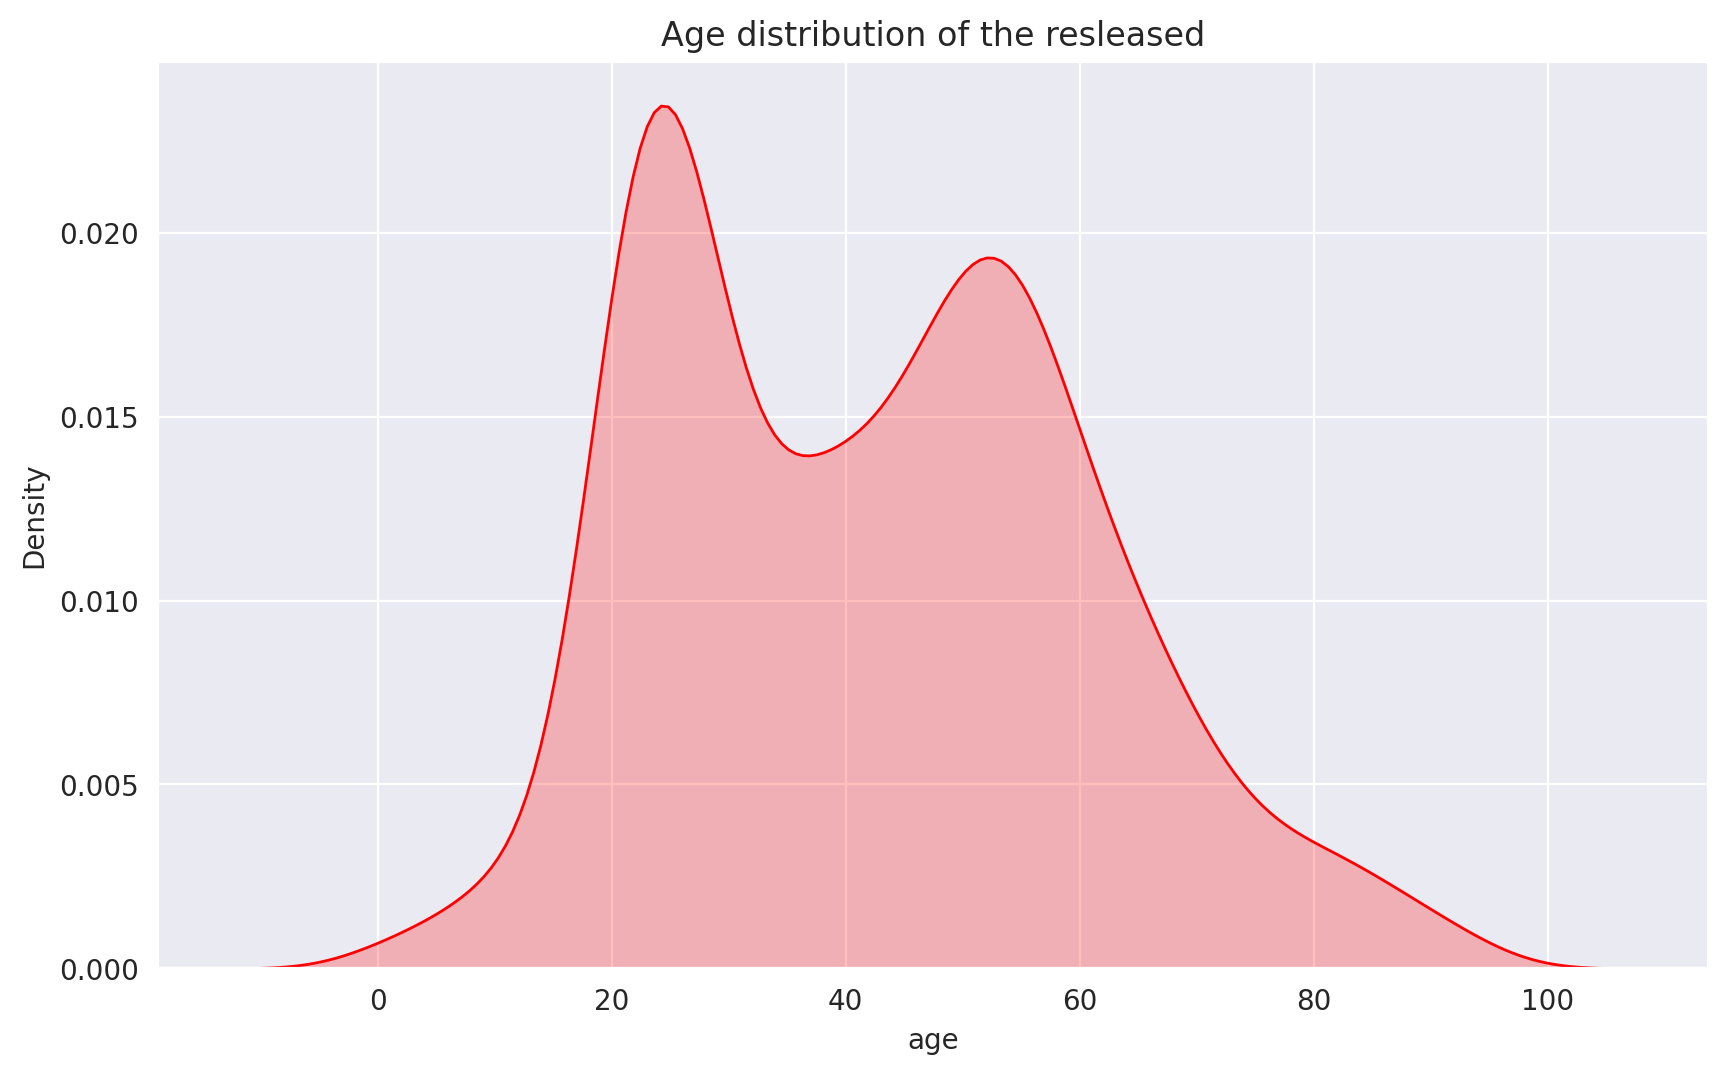

In [ ]:
# 격리해제자들의 연령대 분포 시각화
plt.figure(figsize = (10,6), dpi=200)
sns.set_style("darkgrid")  # 서로 다른 라이브러리 더라도 서로 적용이 되는 경우가 있다.
plt.title("Age distribution of the resleased")
sns.kdeplot(data=released['age'], color='Red', shade=True)  # 분포도를 그리는 함수
# shade = True를 주면 그래프 안쪽에 색을 칠해준다.

print(max(released['age']))
print(min(released['age']))

## 격리된 환자 데이터

In [ ]:
# 격리된 환자의 정보 담기
isolated_state = patient[patient.state == 'isolated']
isolated_state.head()

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
14,1000000015,40.0,male,1943.0,70s,Korea,Seoul,Seongdong-gu,NaN,Seongdong-gu APT,NaN,NaN,8.0,2020-02-11,2020-02-19,NaN,NaN,isolated
87,1000000088,3790.0,male,1975.0,40s,Korea,Seoul,Gwangjin-gu,NaN,Seongdong-gu APT,NaN,NaN,NaN,NaN,2020-03-01,NaN,NaN,isolated
101,1000000102,5666.0,female,1971.0,40s,Korea,Seoul,Yongsan-gu,NaN,Seongdong-gu APT,NaN,NaN,NaN,NaN,2020-03-04,NaN,NaN,isolated
130,1000000131,7401.0,female,1969.0,50s,Korea,Seoul,Eunpyeong-gu,NaN,Guro-gu Call Center,NaN,NaN,NaN,2020-03-07,2020-03-09,NaN,NaN,isolated
132,1000000133,7514.0,female,1977.0,40s,Korea,Seoul,Gangdong-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-03-09,NaN,NaN,isolated


104.0
0.0


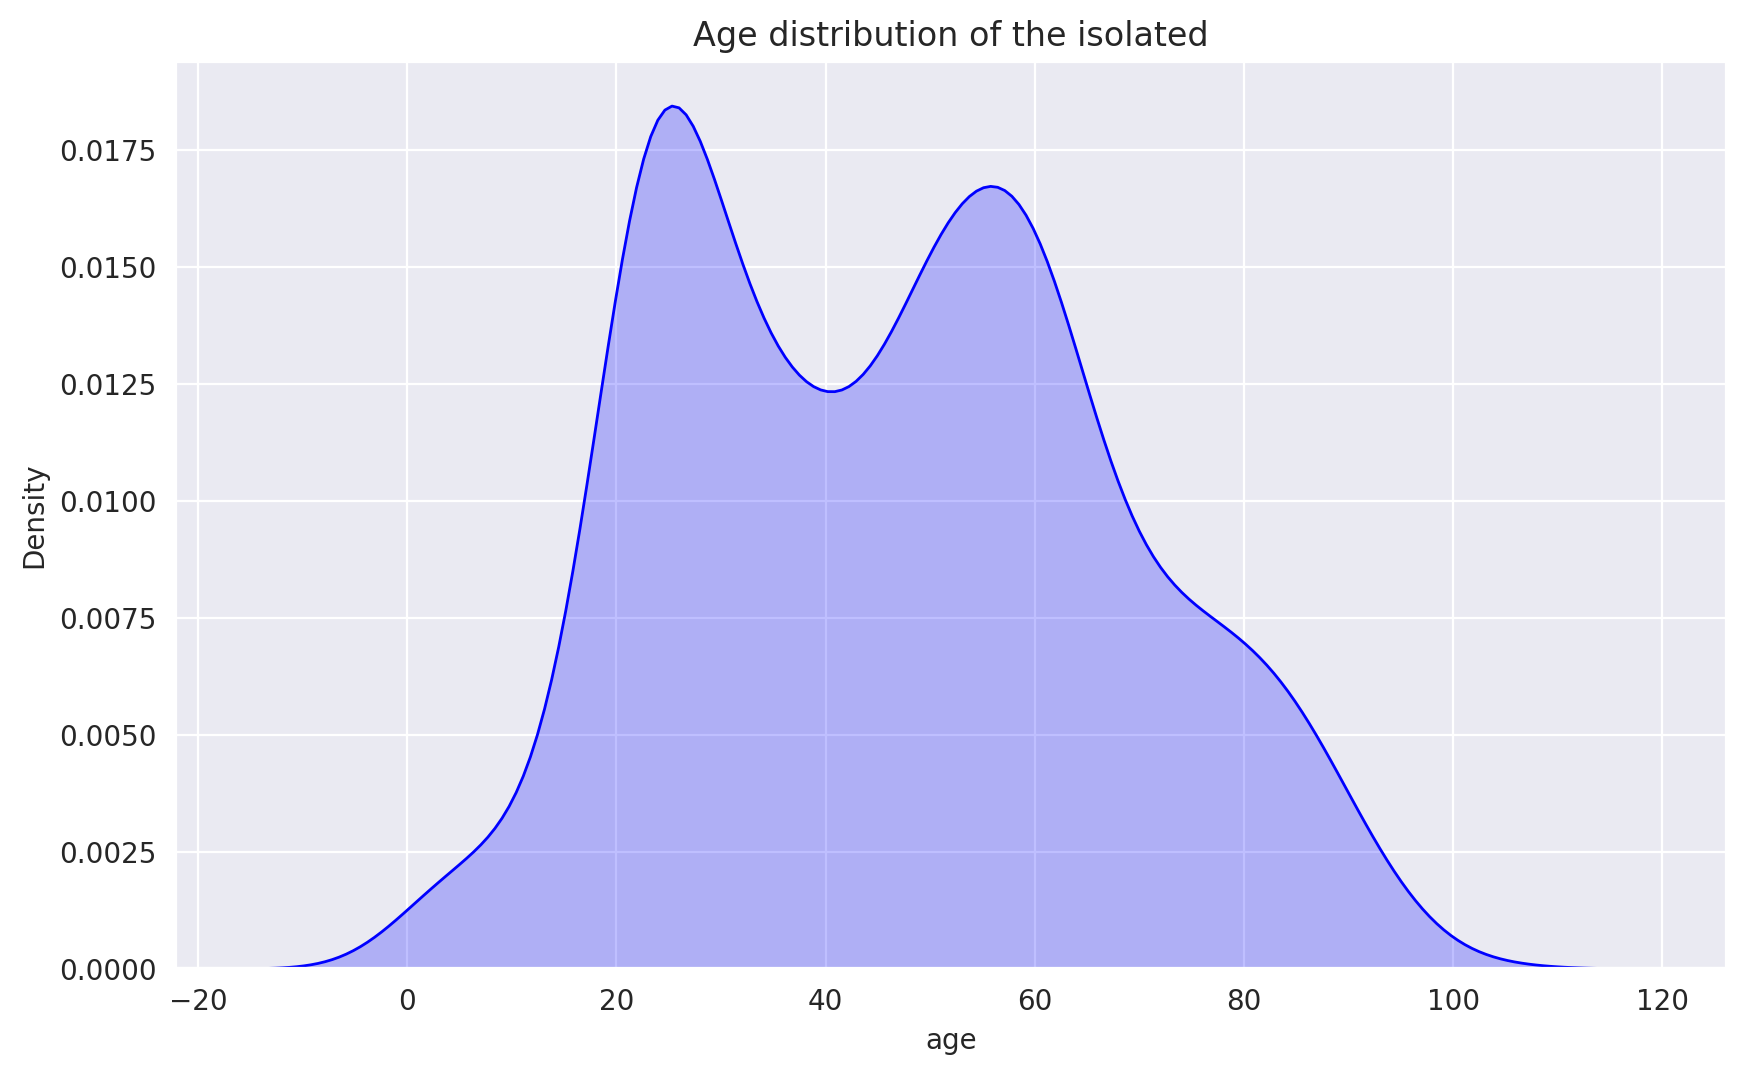

In [ ]:
# 격리자들의 연령대 분포 시각화
plt.figure(figsize = (10,6), dpi=200)
sns.set_style("darkgrid")  # 서로 다른 라이브러리 더라도 서로 적용이 되는 경우가 있다.
plt.title("Age distribution of the isolated")
sns.kdeplot(data=isolated_state['age'], color='Blue', shade=True)

print(max(isolated_state['age']))
print(min(isolated_state['age']))

## 사망자 데이터

In [ ]:
# 사망자의 정보 담기
dead = patient[patient.state == 'deceased']
dead.head()

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
108,1000000109,6773.0,male,1929.0,90s,Korea,Seoul,etc,NaN,contact with patient,NaN,NaN,NaN,2020-03-02,2020-03-07,NaN,NaN,deceased
284,1000000285,8602.0,male,1976.0,40s,Korea,Seoul,Mapo-gu,NaN,Guro-gu Call Center,NaN,NaN,NaN,NaN,2020-03-19,NaN,NaN,deceased
703,1100000071,NaN,male,1941.0,70s,Korea,Busan,Busanjin-gu,NaN,etc,NaN,NaN,1.0,2020-02-28,2020-02-28,NaN,NaN,deceased
727,1100000095,NaN,female,1932.0,80s,Korea,Busan,etc,NaN,NaN,NaN,NaN,24.0,2020-02-15,2020-03-13,NaN,NaN,deceased
729,1100000097,NaN,male,1947.0,70s,Korea,Busan,Busanjin-gu,NaN,etc,NaN,NaN,11.0,2020-03-09,2020-03-13,NaN,NaN,deceased


In [ ]:
dead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 108 to 3205
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          69 non-null     int64  
 1   global_num          59 non-null     float64
 2   gender              69 non-null     object 
 3   birth_year          64 non-null     float64
 4   age                 64 non-null     float64
 5   country             69 non-null     object 
 6   province            69 non-null     object 
 7   city                50 non-null     object 
 8   disease             18 non-null     object 
 9   infection_case      29 non-null     object 
 10  infection_order     0 non-null      float64
 11  infected_by         0 non-null      float64
 12  contact_number      4 non-null      float64
 13  symptom_onset_date  6 non-null      object 
 14  confirmed_date      69 non-null     object 
 15  released_date       2 non-null      object 
 16  deceas

92.0
36.0


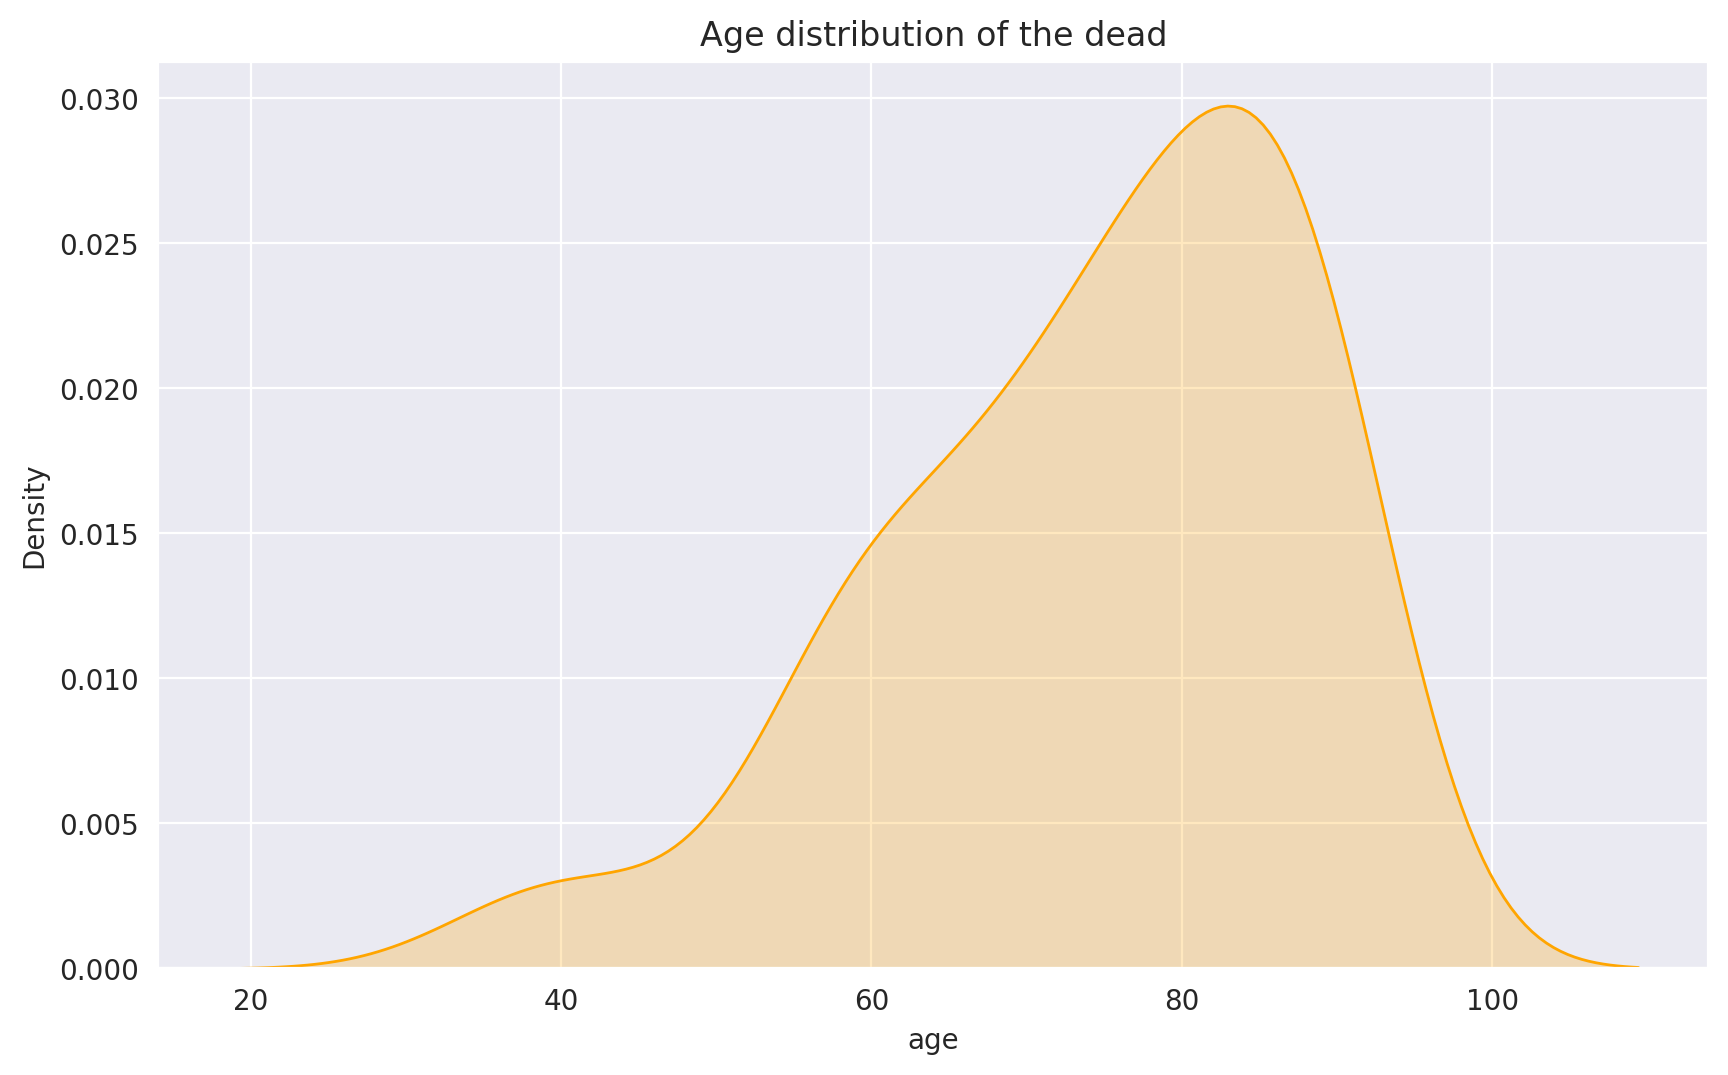

In [ ]:
# 사망자의 연령대 분포 시각화
plt.figure(figsize = (10,6), dpi=200)
sns.set_style("darkgrid")  # 서로 다른 라이브러리 더라도 서로 적용이 되는 경우가 있다.
plt.title("Age distribution of the dead")
sns.kdeplot(data=dead['age'], color='Orange', shade=True)

print(max(dead['age']))
print(min(dead['age']))

## 5. 사망자에 따른 성별(Gender) 데이터 분석

In [ ]:
male_dead = dead[dead.gender == 'male']
female_dead = dead[dead.gender == 'female']

In [ ]:
male_dead.head()

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
108,1000000109,6773.0,male,1929.0,90s,Korea,Seoul,etc,NaN,contact with patient,NaN,NaN,NaN,2020-03-02,2020-03-07,NaN,NaN,deceased
284,1000000285,8602.0,male,1976.0,40s,Korea,Seoul,Mapo-gu,NaN,Guro-gu Call Center,NaN,NaN,NaN,NaN,2020-03-19,NaN,NaN,deceased
703,1100000071,NaN,male,1941.0,70s,Korea,Busan,Busanjin-gu,NaN,etc,NaN,NaN,1.0,2020-02-28,2020-02-28,NaN,NaN,deceased
729,1100000097,NaN,male,1947.0,70s,Korea,Busan,Busanjin-gu,NaN,etc,NaN,NaN,11.0,2020-03-09,2020-03-13,NaN,NaN,deceased
811,1200000114,114.0,male,1946.0,70s,Korea,Daegu,NaN,NaN,Shincheonji Church,NaN,NaN,NaN,NaN,2020-02-21,NaN,2020-02-26,deceased


In [ ]:
male_dead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 108 to 3154
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          44 non-null     int64  
 1   global_num          39 non-null     float64
 2   gender              44 non-null     object 
 3   birth_year          42 non-null     float64
 4   age                 42 non-null     float64
 5   country             44 non-null     object 
 6   province            44 non-null     object 
 7   city                31 non-null     object 
 8   disease             13 non-null     object 
 9   infection_case      20 non-null     object 
 10  infection_order     0 non-null      float64
 11  infected_by         0 non-null      float64
 12  contact_number      2 non-null      float64
 13  symptom_onset_date  5 non-null      object 
 14  confirmed_date      44 non-null     object 
 15  released_date       0 non-null      object 
 16  deceas

In [ ]:
female_dead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 727 to 3205
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          25 non-null     int64  
 1   global_num          20 non-null     float64
 2   gender              25 non-null     object 
 3   birth_year          22 non-null     float64
 4   age                 22 non-null     float64
 5   country             25 non-null     object 
 6   province            25 non-null     object 
 7   city                19 non-null     object 
 8   disease             5 non-null      object 
 9   infection_case      9 non-null      object 
 10  infection_order     0 non-null      float64
 11  infected_by         0 non-null      float64
 12  contact_number      2 non-null      float64
 13  symptom_onset_date  1 non-null      object 
 14  confirmed_date      25 non-null     object 
 15  released_date       2 non-null      object 
 16  deceas

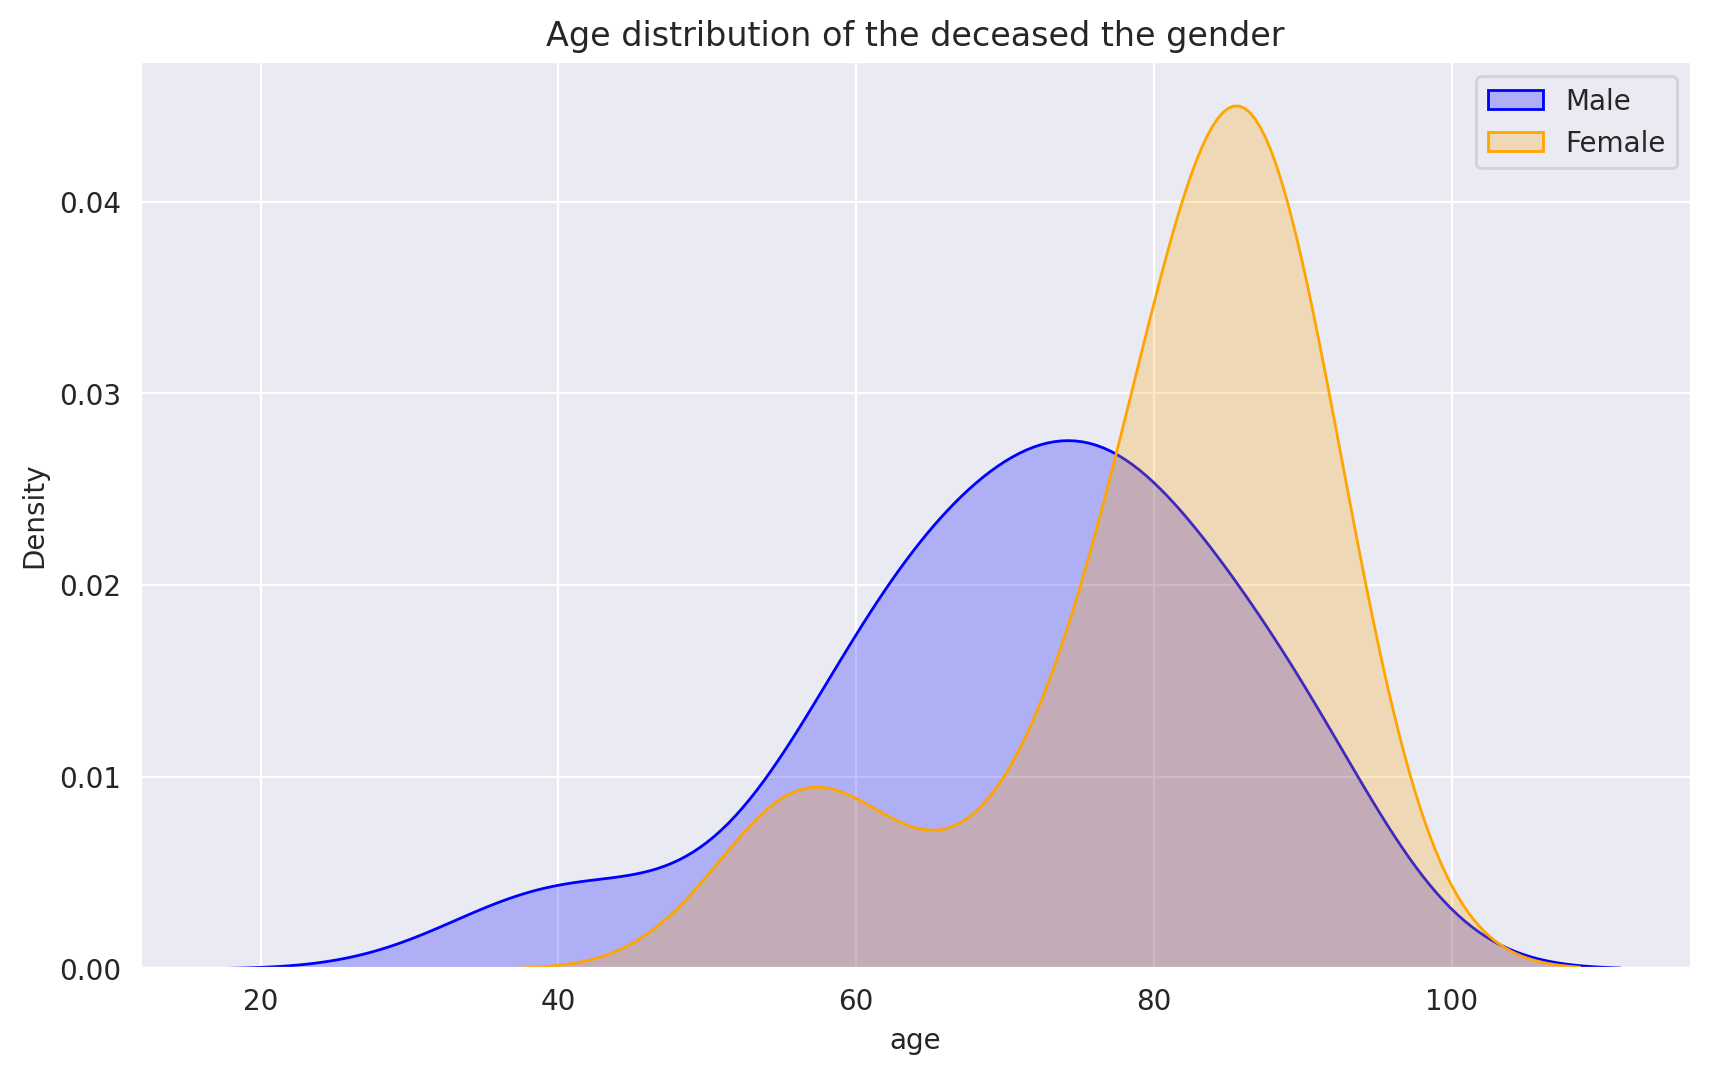

In [ ]:
# 사망자의 성별에 따른 사망자 연령 분포 시각화
plt.figure(figsize = (10,6), dpi=200)
sns.set_style("darkgrid")  # 서로 다른 라이브러리 더라도 서로 적용이 되는 경우가 있다.
plt.title("Age distribution of the deceased the gender")
sns.kdeplot(data=male_dead['age'], color='Blue', label = 'Male', shade=True)
sns.kdeplot(data=female_dead['age'], color='Orange', label = 'Female', shade=True)
plt.legend()

plt.show()

# kde 커널 정밀도

### 사망자 성별비교 -> 바차트 -> 파이차트 -> 분포

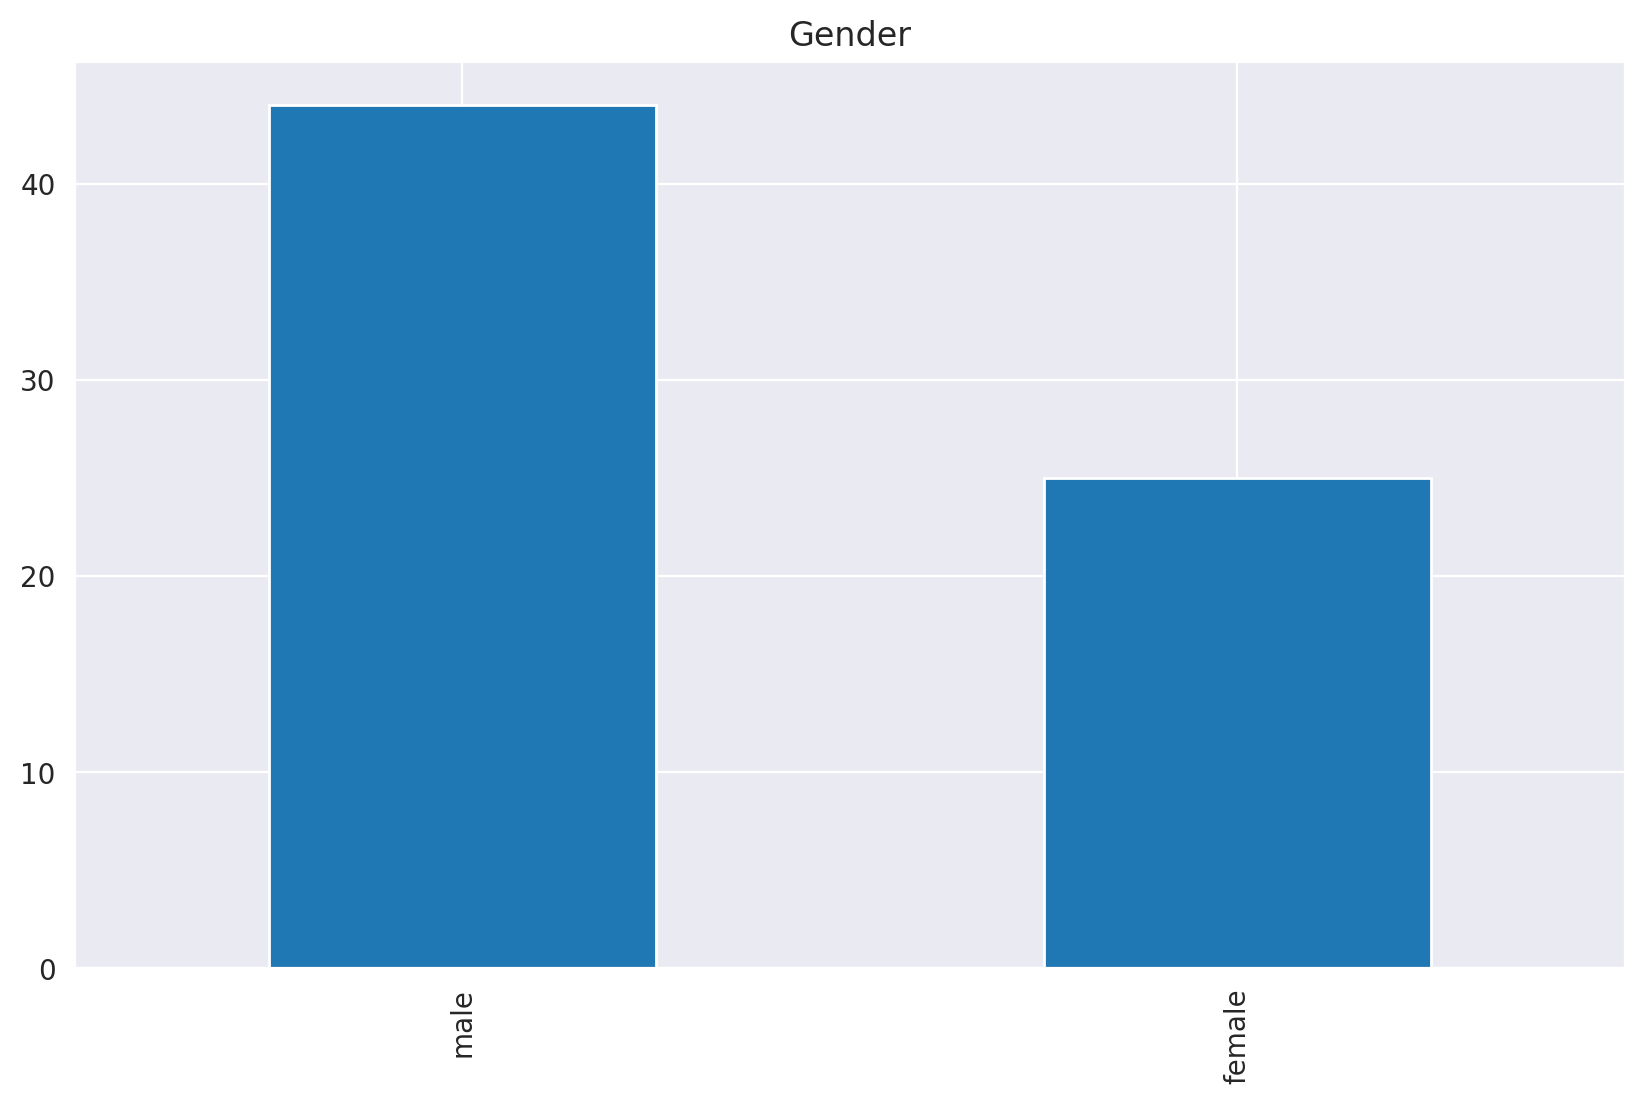

In [ ]:
plt.figure(figsize = (10,6), dpi=200)
plt.title("Gender")
dead.gender.value_counts().plot.bar()  
# 해당 컬럼에 벨류의 분류가 잘 되어 있으면 value_counts()함수를 사용해서 분류별 수를 셀수 있다.

plt.show()

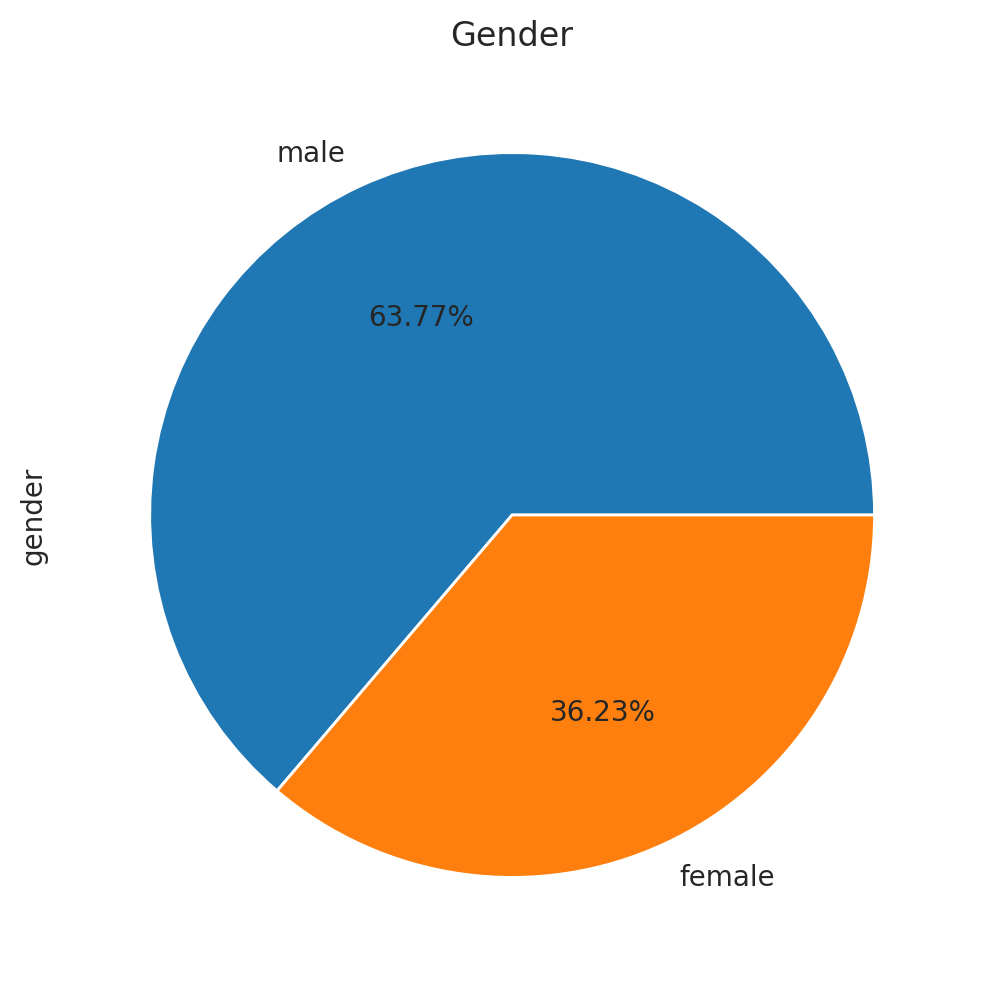

In [ ]:
plt.figure(figsize = (10,6), dpi=200)
plt.title("Gender")
dead.gender.value_counts().plot.pie(autopct = '%.2f%%') 

plt.show()

### KDE : Kernel Density Estimator 추가한 distplot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



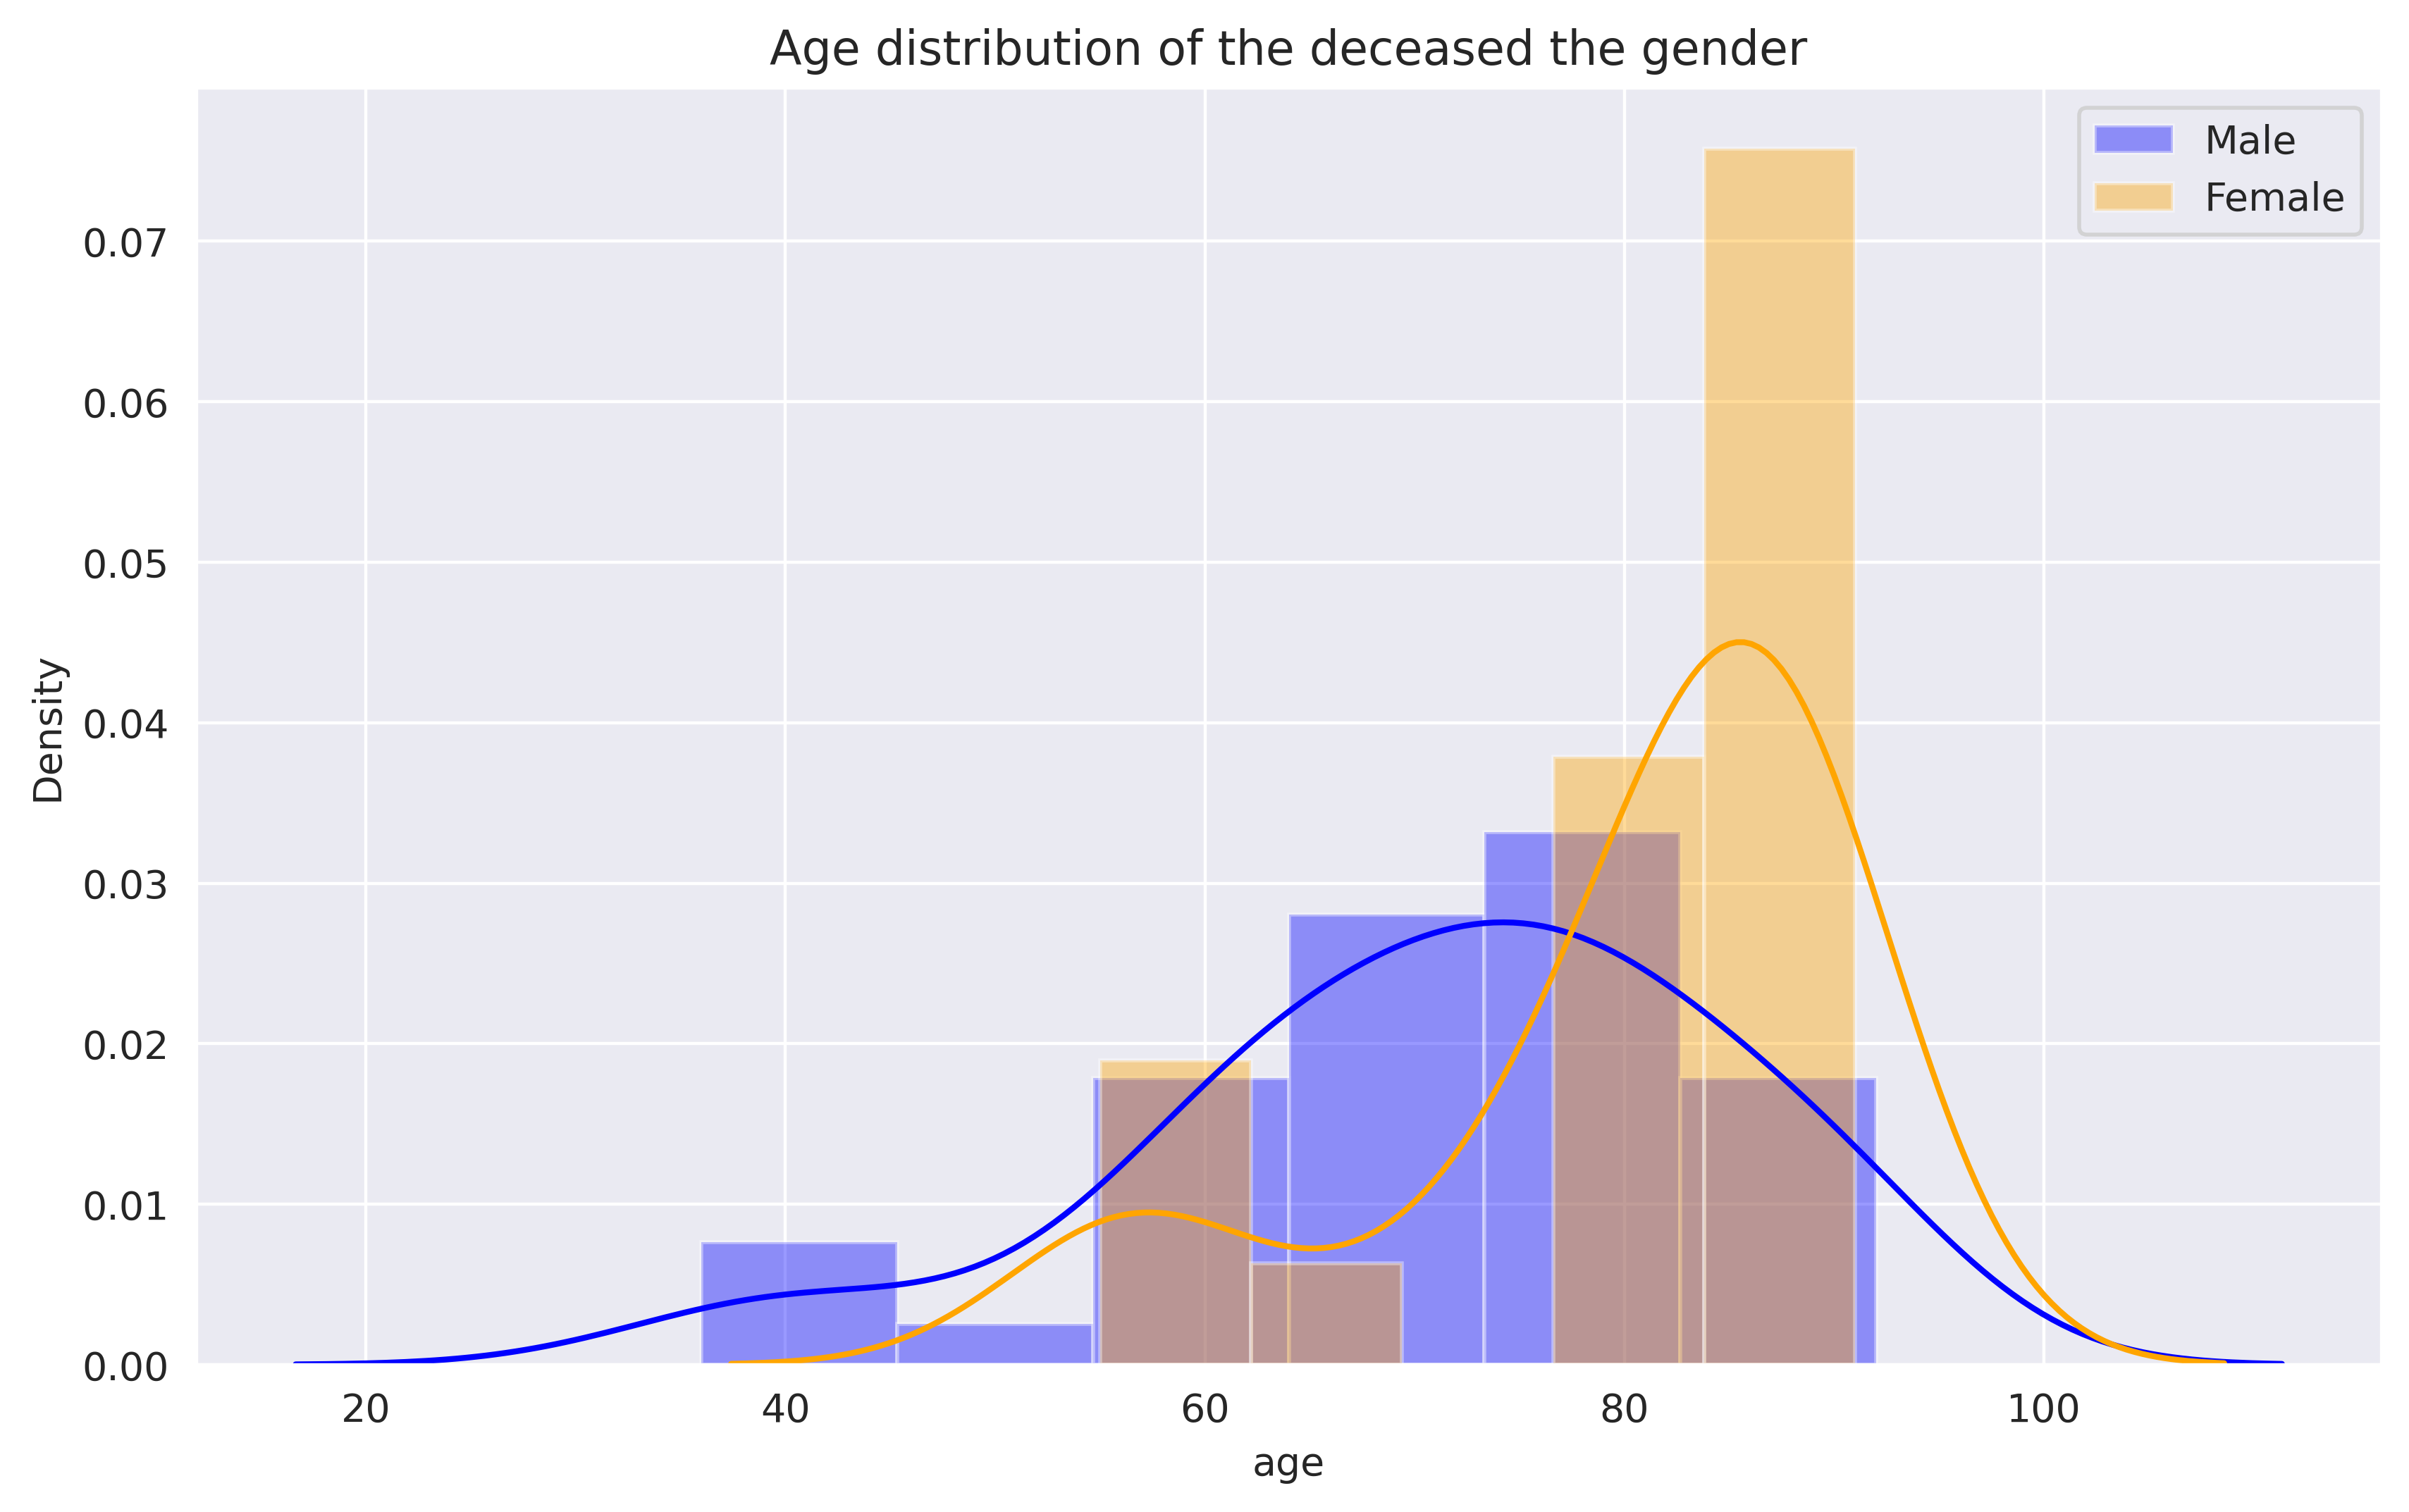

In [ ]:
# 성별에 따른 사망자의 연령분포 - distplot 사용
plt.figure(figsize = (10,6), dpi=200)
sns.set_style("darkgrid")  # 서로 다른 라이브러리 더라도 서로 적용이 되는 경우가 있다.
plt.title("Age distribution of the deceased the gender")
sns.distplot(a=male_dead['age'], color='Blue', label = 'Male', kde=True)
sns.distplot(a=female_dead['age'], color='Orange', label = 'Female', kde=True)
plt.legend()  # 범례 추가

plt.show()

## 환자 유형별(격리해제자, 격리중, 사망자)연령분포 한번에 보기

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


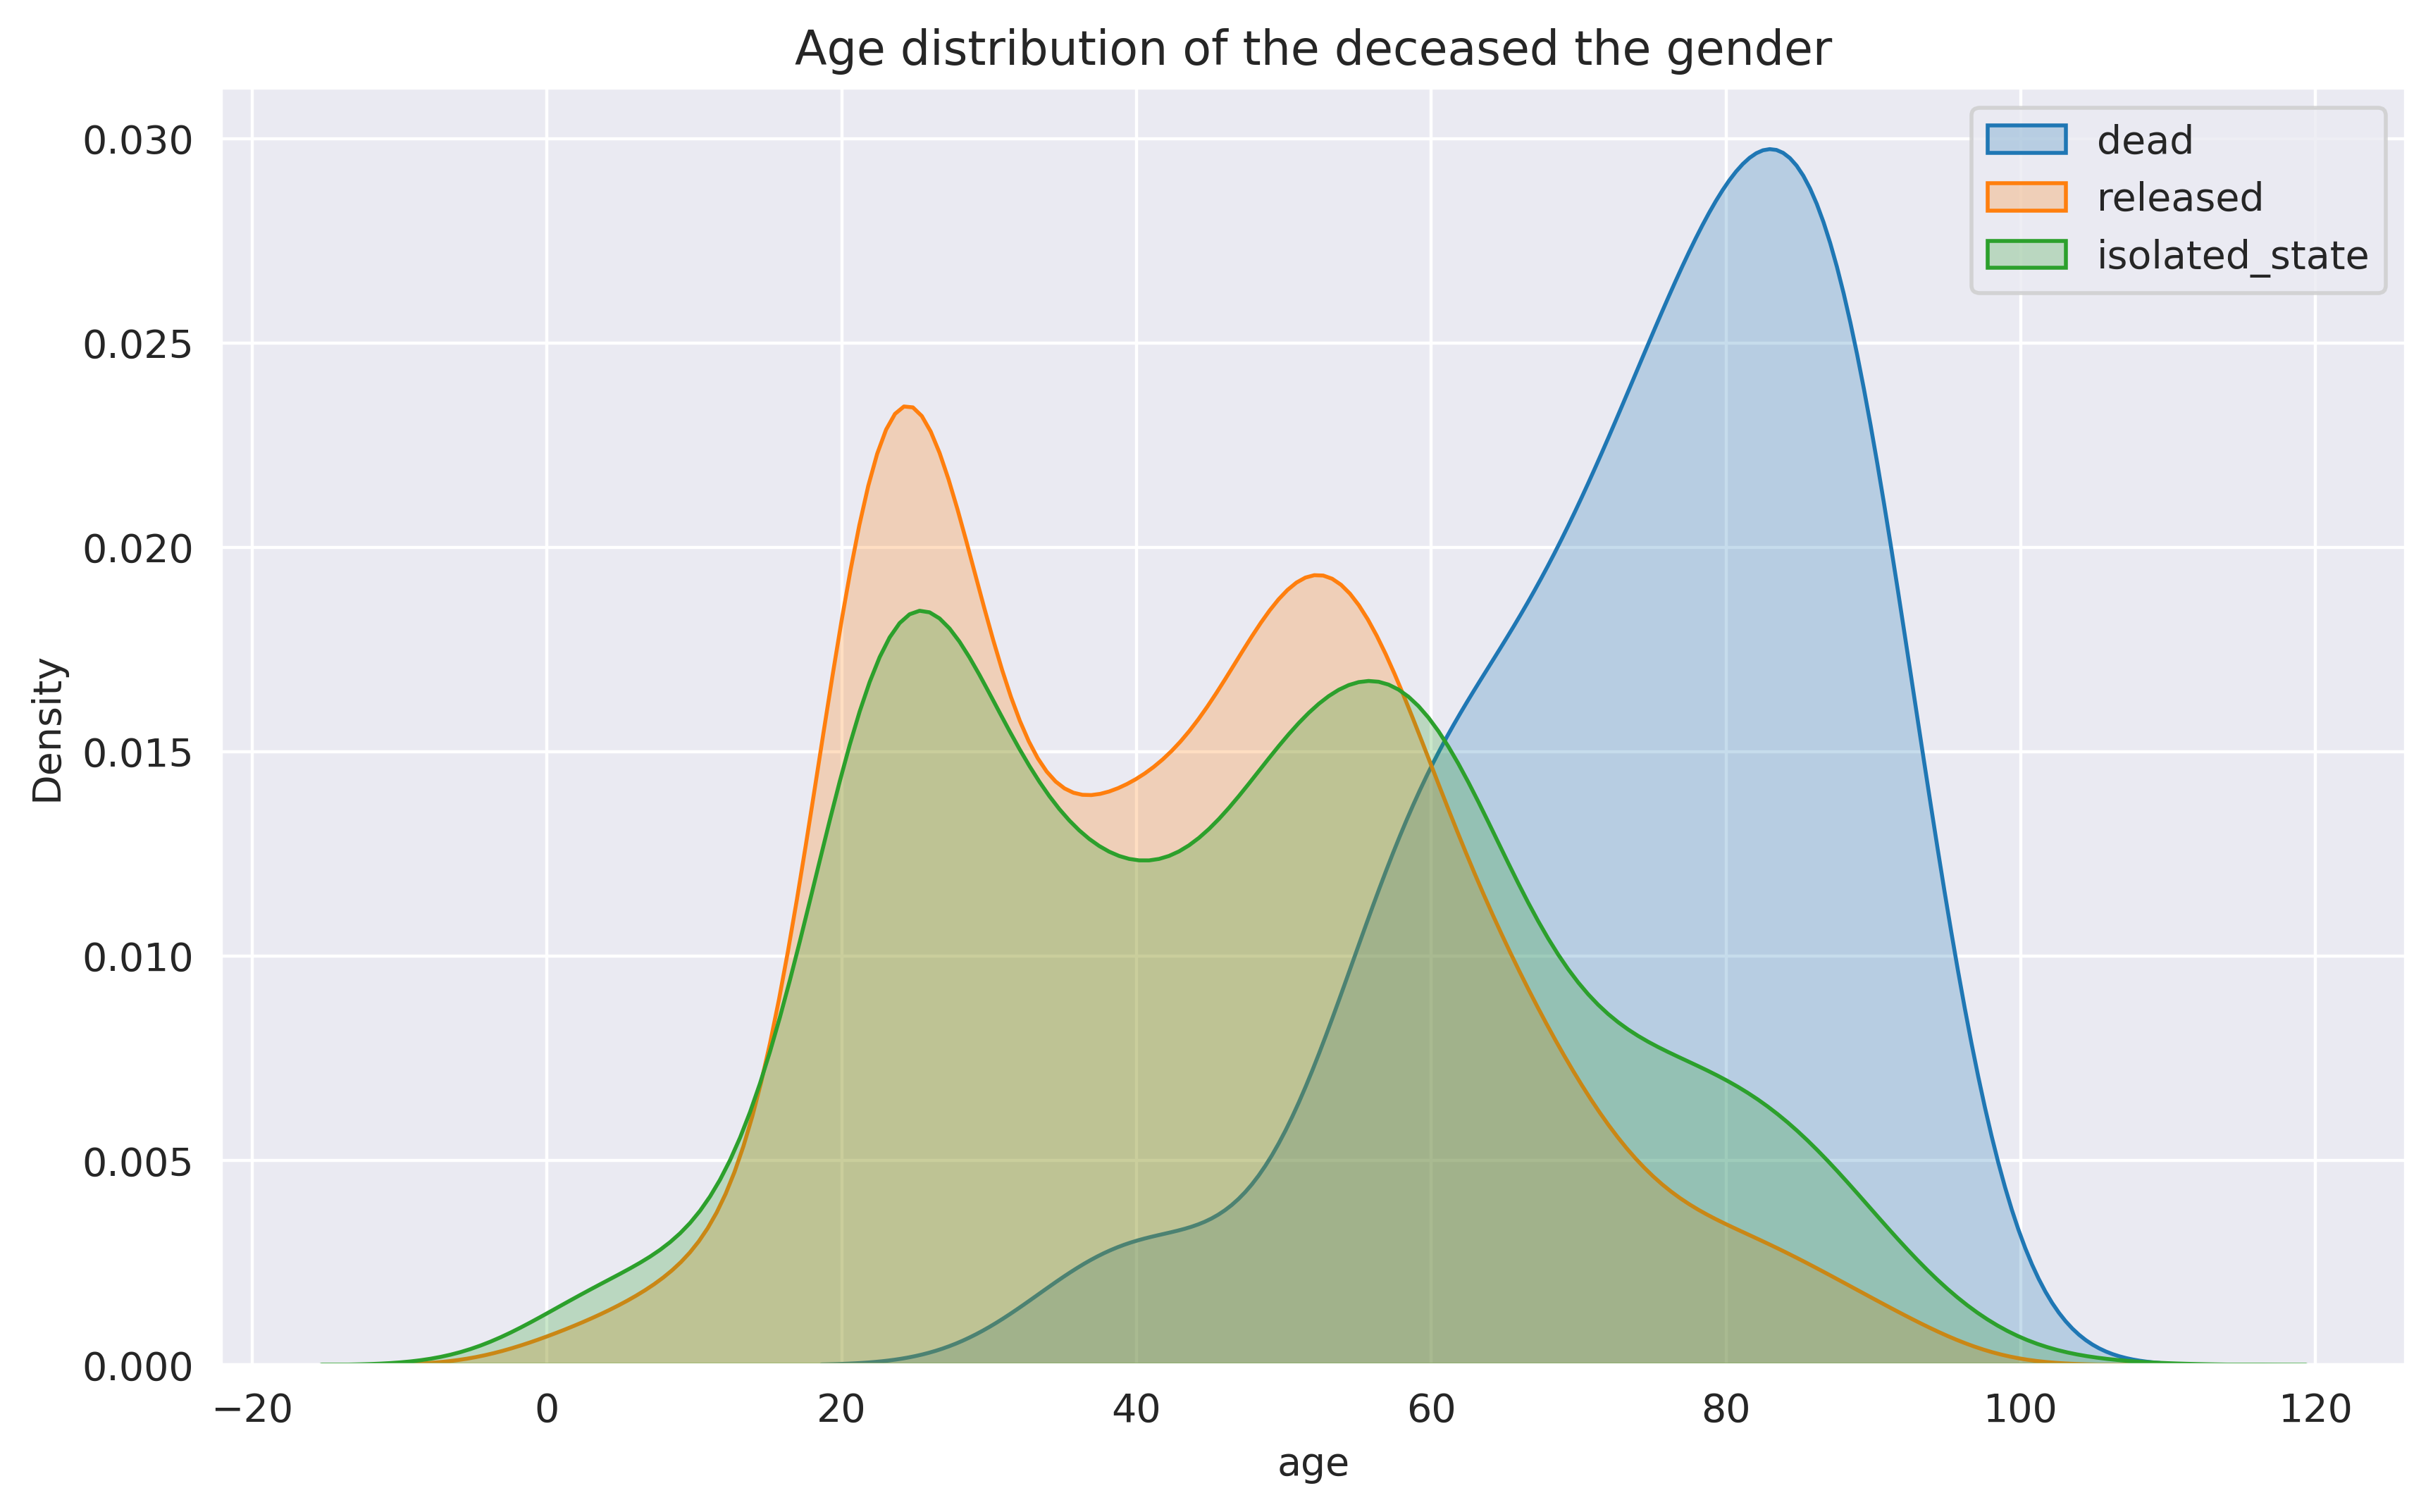

In [ ]:
plt.figure(figsize = (10,6), dpi=200)
sns.set_style("darkgrid")  # 서로 다른 라이브러리 더라도 서로 적용이 되는 경우가 있다.
plt.title("Age distribution of the deceased the gender")
sns.kdeplot(data=dead['age'], label = 'dead', shade=True)
sns.kdeplot(data=released['age'], label = 'released', shade=True)
sns.kdeplot(data=isolated_state['age'], label = 'isolated_state', shade=True)
plt.legend()

# 단순 기사 자료보다 질병관리청 같은 곳에서 직접 발표한 내용을 갖고 설명하는것이 더 좋음
plt.show()

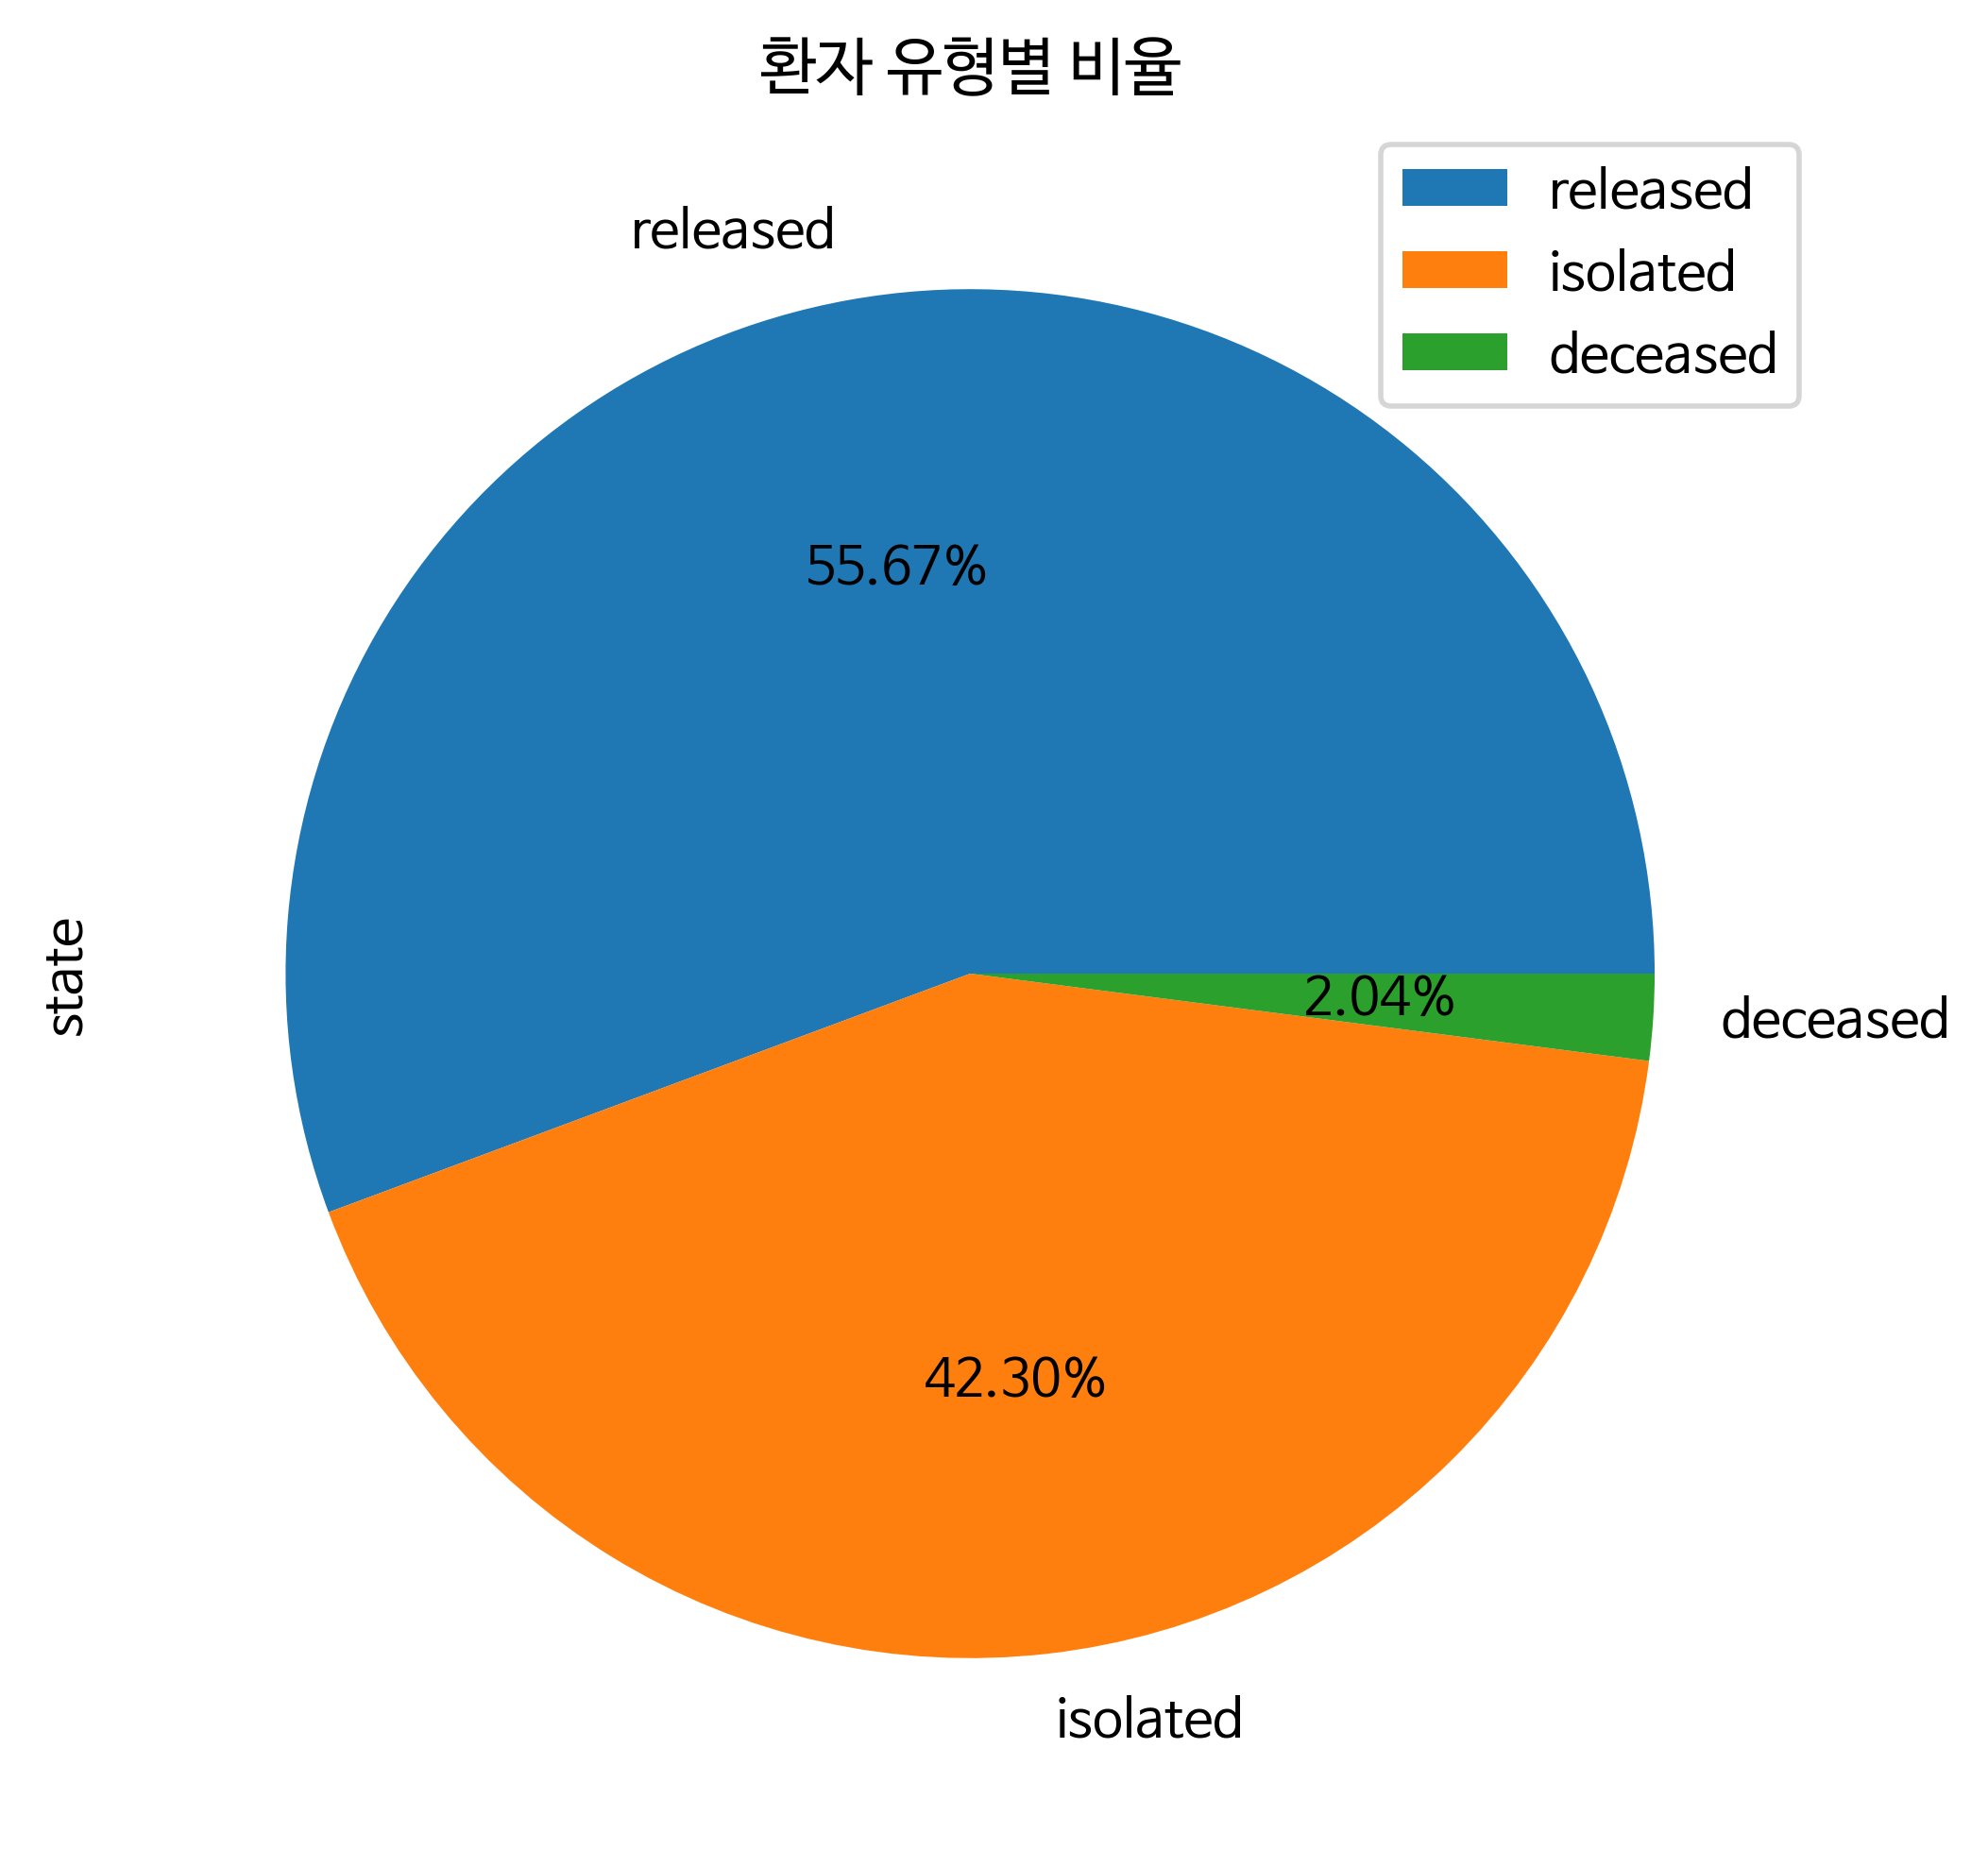

In [ ]:
plt.figure(figsize = (10,6), dpi=200)
plt.title("환자 유형별 비율")
df_patient.state.value_counts().plot.pie(autopct = '%.2f%%') 
plt.legend()

plt.show()

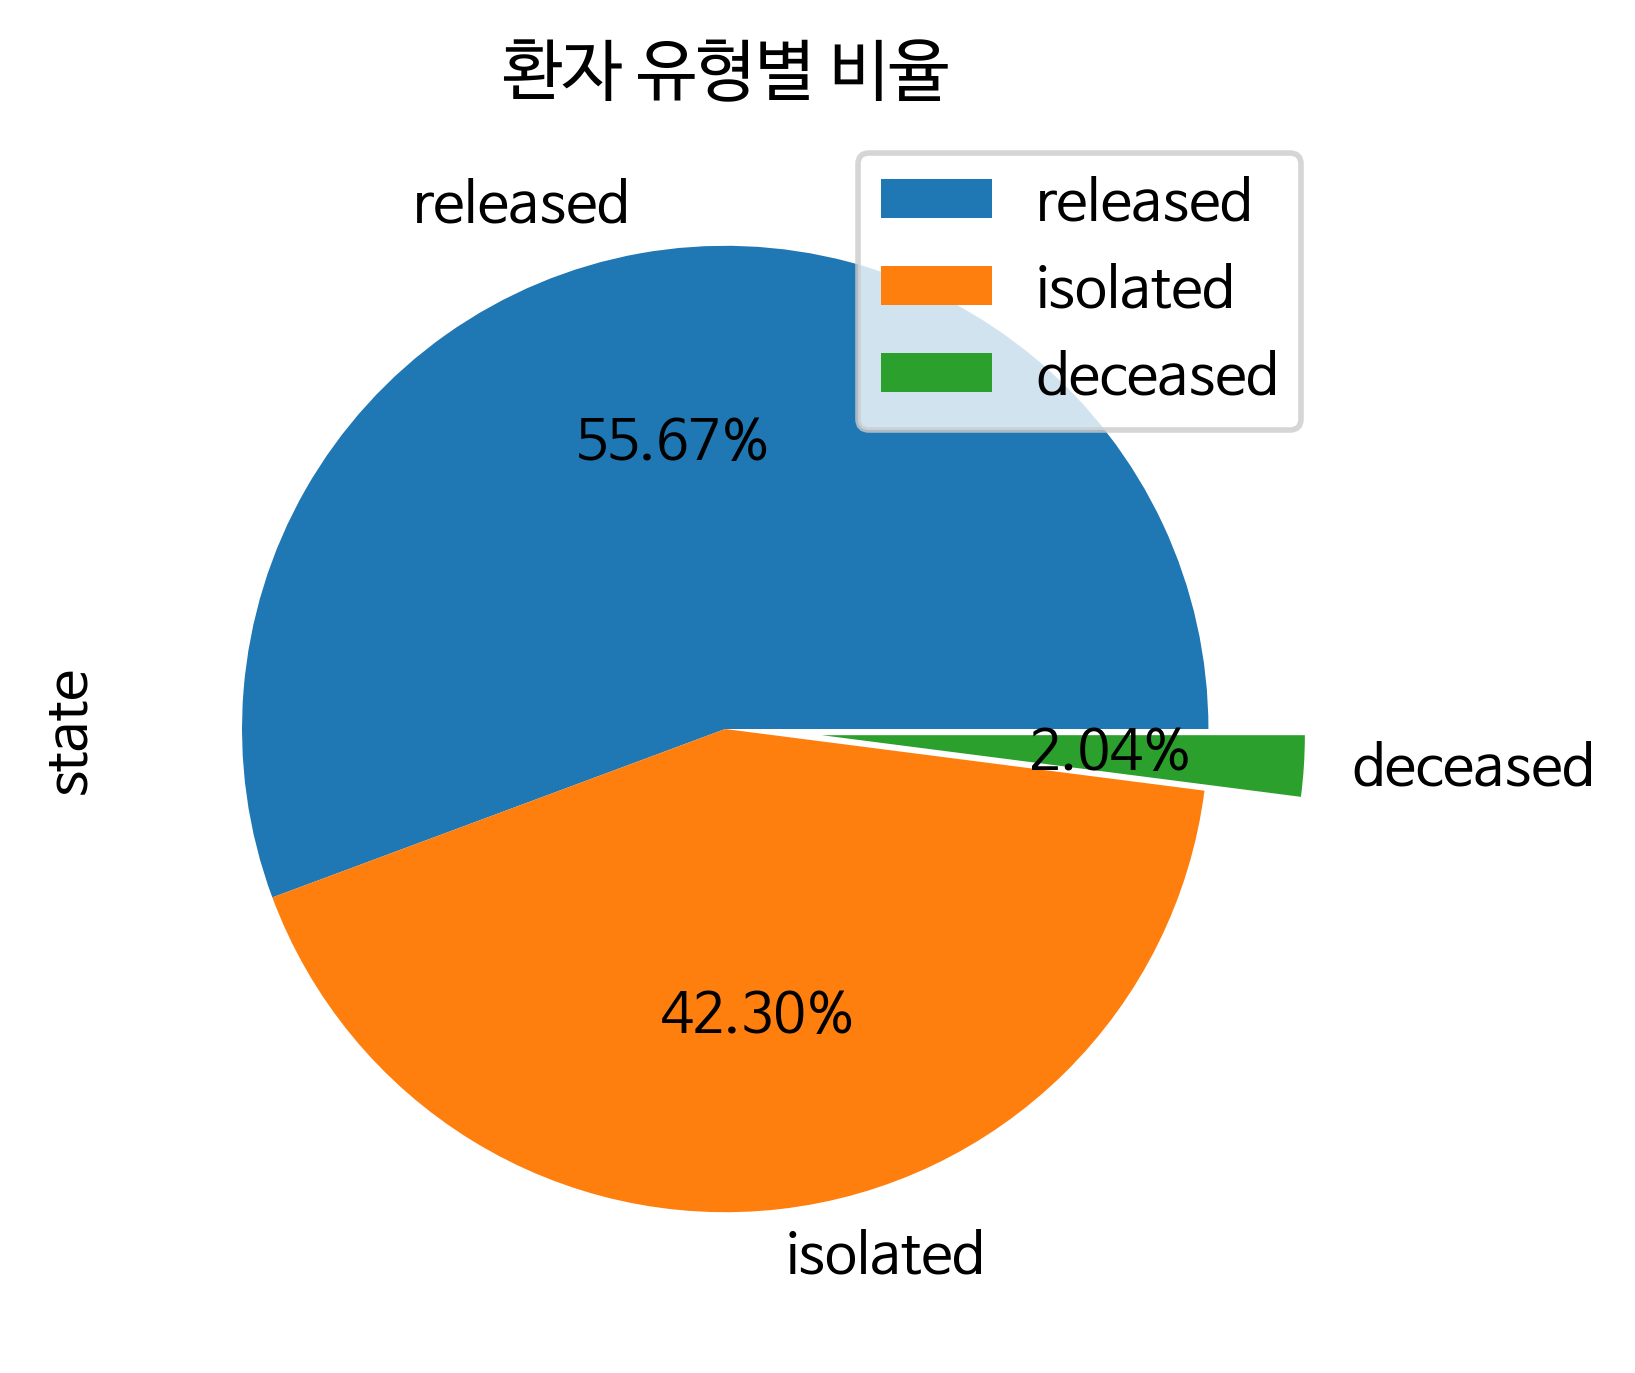

In [ ]:
plt.figure(dpi=200)
plt.title("환자 유형별 비율")
explode = [0, 0, 0.2]
df_patient.state.value_counts().plot.pie(explode=explode, autopct = '%.2f%%') 
plt.legend()

plt.show()

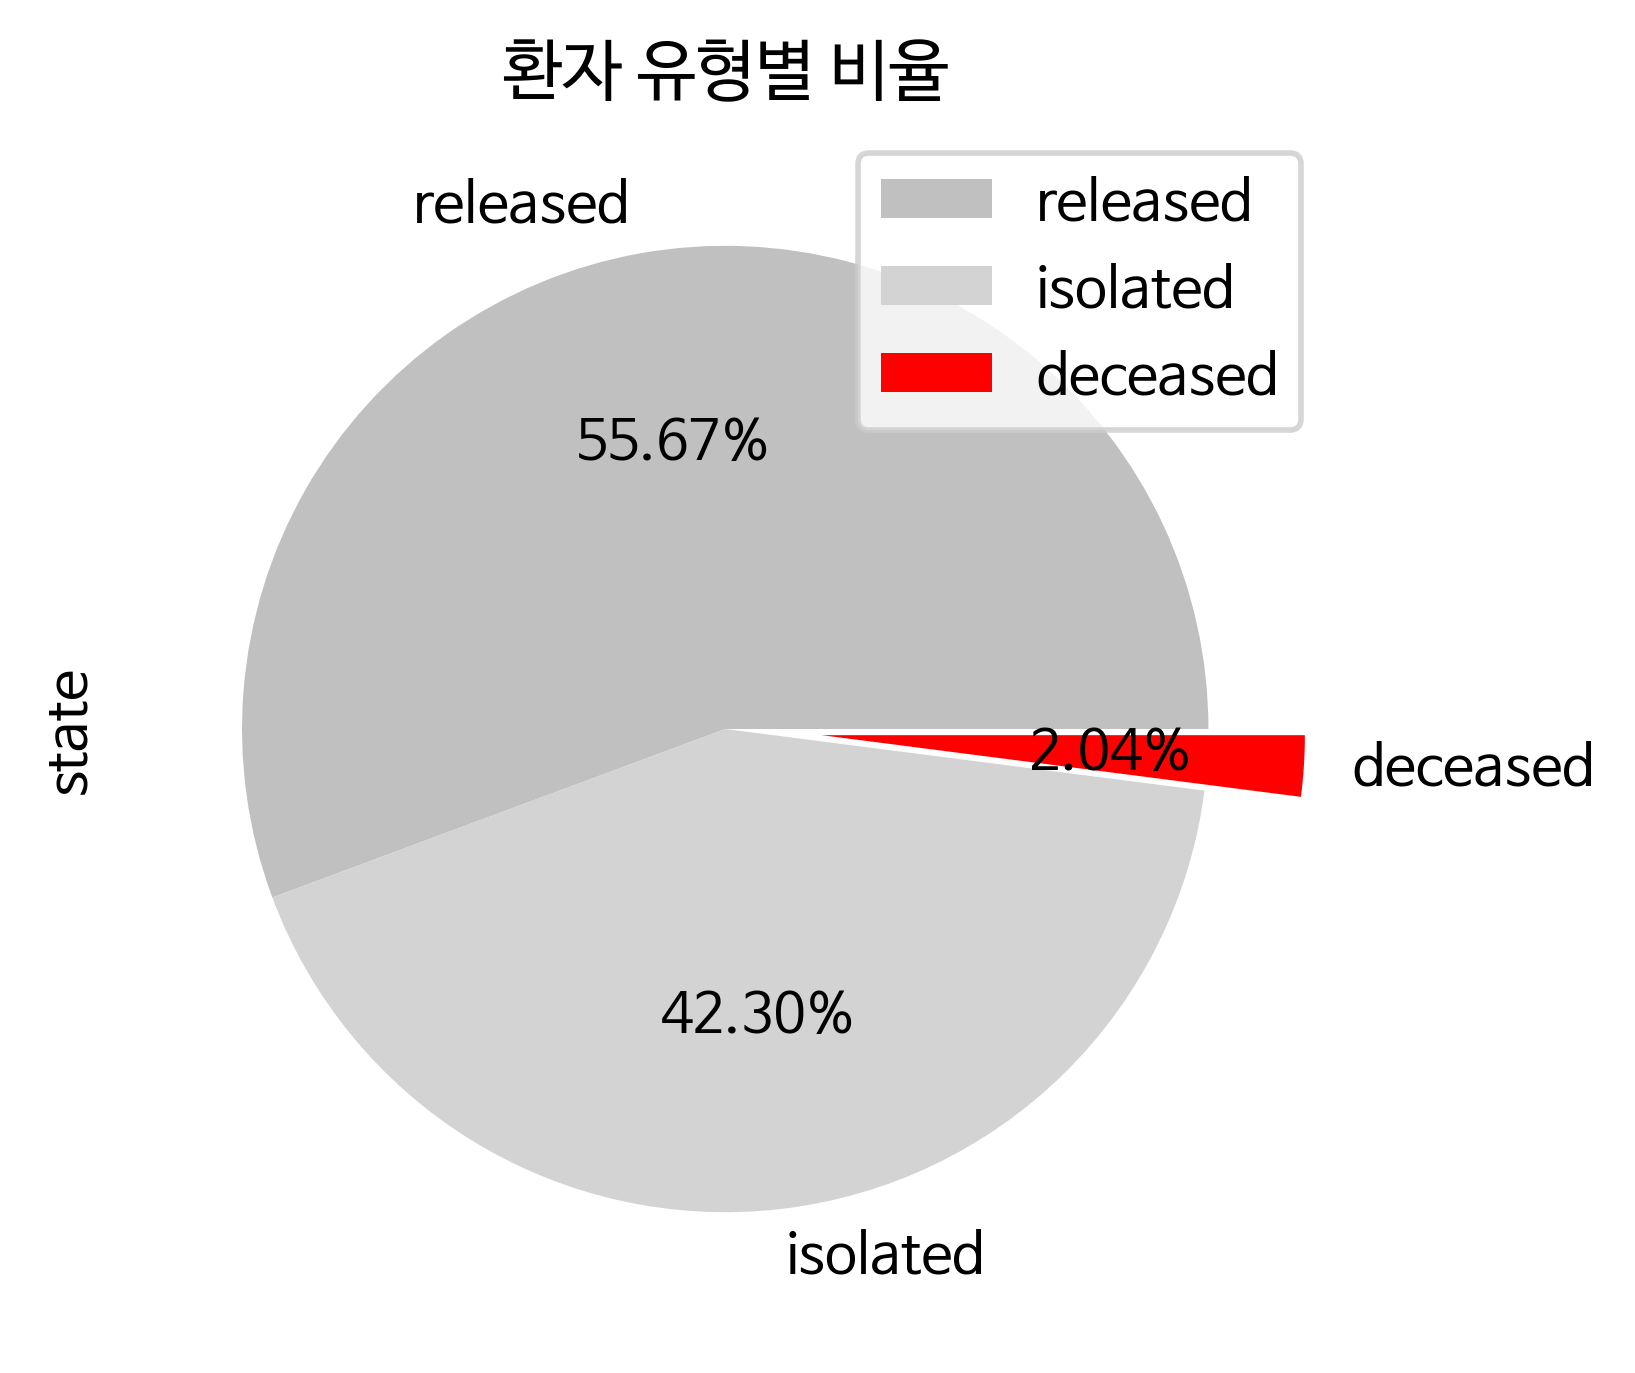

In [ ]:
plt.figure(dpi=200)
plt.title("환자 유형별 비율")
explode = [0, 0, 0.2]
colors = ['silver', 'lightgray', 'red']
df_patient.state.value_counts().plot.pie(explode=explode, autopct = '%.2f%%', colors=colors) 
plt.legend()

plt.show()

In [ ]:
dead[dead['deceased_date'].notnull()].value_counts()


Series([], dtype: int64)

In [ ]:
female_dead2 = female_dead['confirmed_date'].value_counts()
female_dead3 = female_dead2.sort_index()
print(female_dead2)
print(female_dead3)

2020-03-07    2
2020-03-01    2
2020-03-29    2
2020-02-29    2
2020-03-20    2
2020-02-26    1
2020-03-02    1
2020-03-15    1
2020-03-05    1
2020-03-13    1
2020-03-04    1
2020-02-21    1
2020-02-18    1
2020-04-03    1
2020-02-22    1
2020-02-28    1
2020-03-11    1
2020-02-25    1
2020-03-25    1
2020-03-06    1
Name: confirmed_date, dtype: int64
2020-02-18    1
2020-02-21    1
2020-02-22    1
2020-02-25    1
2020-02-26    1
2020-02-28    1
2020-02-29    2
2020-03-01    2
2020-03-02    1
2020-03-04    1
2020-03-05    1
2020-03-06    1
2020-03-07    2
2020-03-11    1
2020-03-13    1
2020-03-15    1
2020-03-20    2
2020-03-25    1
2020-03-29    2
2020-04-03    1
Name: confirmed_date, dtype: int64


In [ ]:
male_dead2 = male_dead['confirmed_date'].value_counts()
male_dead3 = male_dead2.sort_index()
print(male_dead3)

2020-02-19    2
2020-02-20    1
2020-02-21    2
2020-02-22    3
2020-02-24    1
2020-02-25    2
2020-02-26    2
2020-02-27    2
2020-02-28    6
2020-02-29    1
2020-03-01    3
2020-03-03    1
2020-03-04    1
2020-03-05    1
2020-03-06    1
2020-03-07    1
2020-03-08    1
2020-03-10    2
2020-03-13    1
2020-03-15    1
2020-03-19    1
2020-03-20    6
2020-03-21    1
2020-03-26    1
Name: confirmed_date, dtype: int64


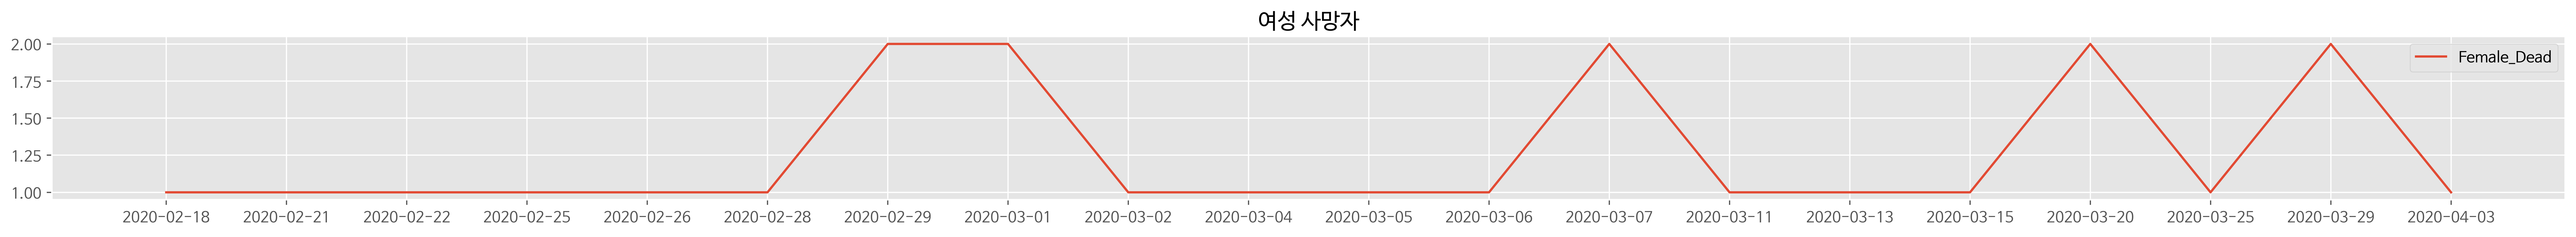

In [ ]:
plt.figure(figsize=(30, 2), dpi=200)
plt.style.use('ggplot')
plt.rc('font', family = 'NanumBarunGothic')
plt.title("여성 사망자")
# femail_dead = female_dead.sort_values('confirmed_date')
plt.plot(female_dead3, label='Female_Dead')
plt.legend()

plt.show()

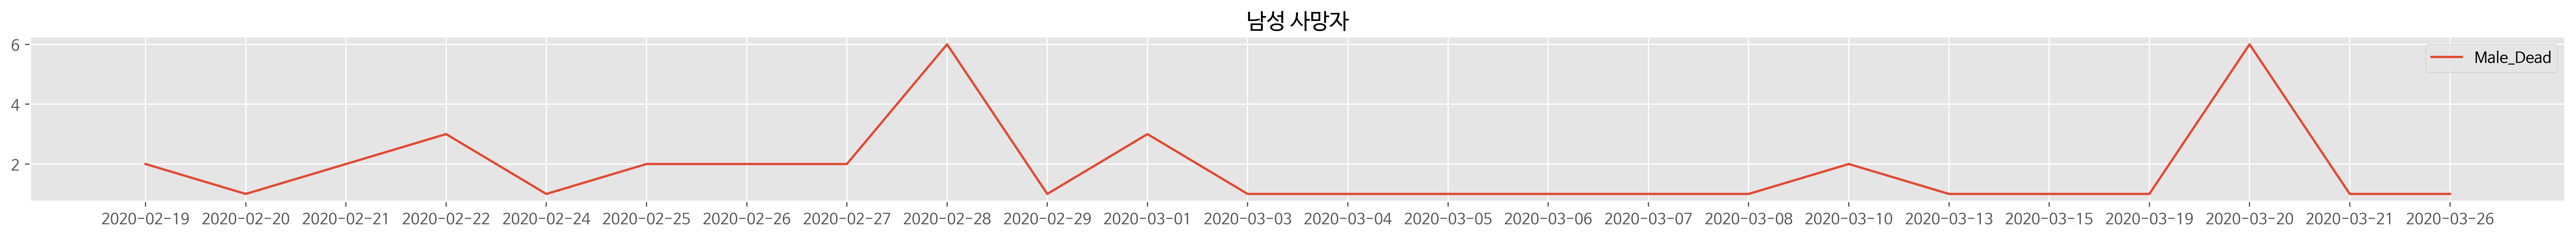

In [ ]:
plt.figure(figsize=(30, 2), dpi=200)
plt.style.use('ggplot')
plt.rc('font', family = 'NanumBarunGothic')
plt.title("남성 사망자")
plt.plot(male_dead3, label='Male_Dead')
plt.legend()

plt.show()

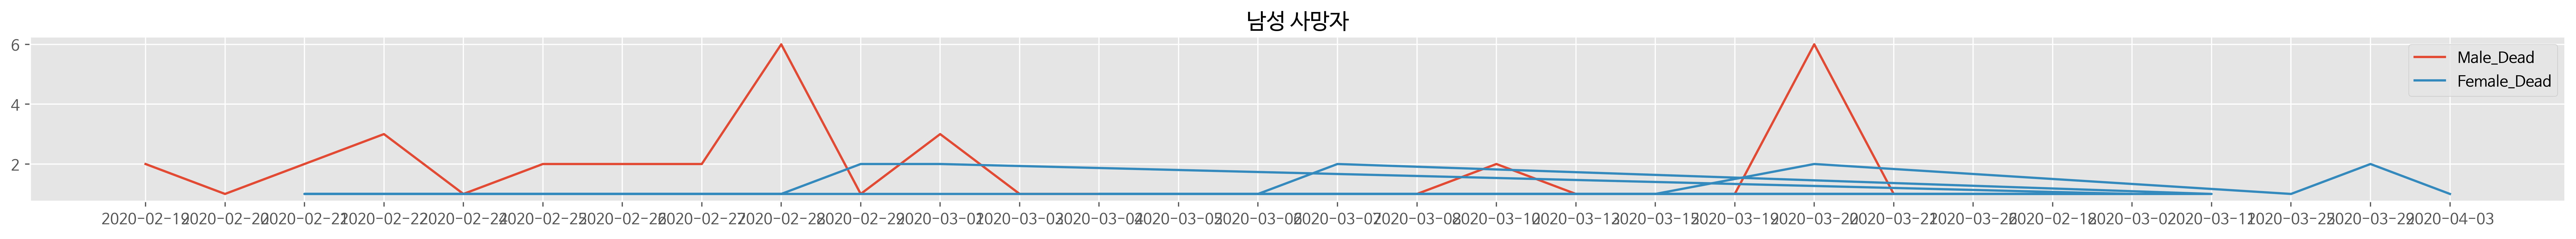

In [ ]:
plt.figure(figsize=(30, 2), dpi=200)
plt.style.use('ggplot')
plt.rc('font', family = 'NanumBarunGothic')
plt.title("남성 사망자")
plt.plot(male_dead3, label='Male_Dead')
plt.plot(female_dead3, label='Female_Dead')
plt.legend()

plt.show()

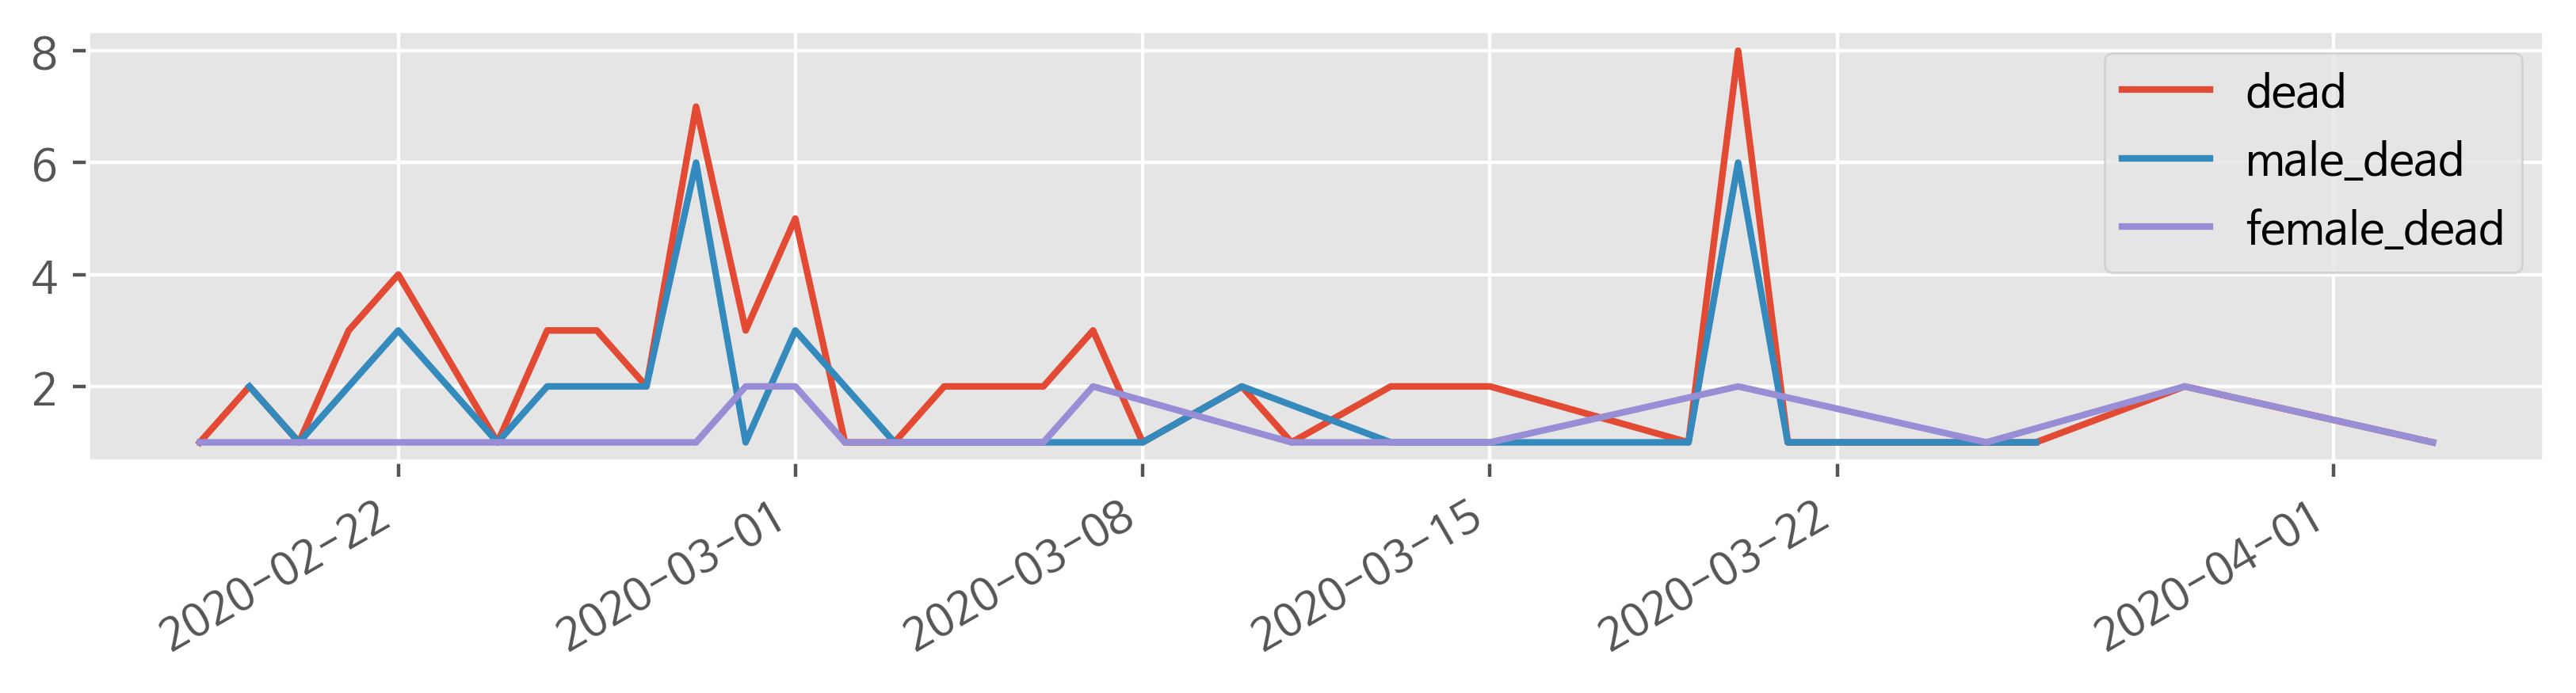

In [ ]:
# to_datetime()으로 날짜순 정렬하기 -> 날짜순 데이터로 그래프 그리기
plt.figure(figsize=(10, 2), dpi=200)
plt.style.use('ggplot')
pd.to_datetime(dead.confirmed_date).value_counts().plot(label='dead')
pd.to_datetime(male_dead.confirmed_date).value_counts().plot(label='male_dead')
pd.to_datetime(female_dead.confirmed_date).value_counts().plot(label='female_dead')
plt.legend()

plt.show()